# **Analysis of Tropical Cyclone Landfalls in the Philippines Using TempExt Algorithm of HighResMIP Data**

Data: CMIP6 HighResMIP Tropical Storm Tracks.  

About highresmip: https://highresmip.org/

Source: https://catalogue.ceda.ac.uk/uuid/e82a62d926d7448696a2b60c1925f811/

Six Models with Four Simulations of TRACK Algorithm in HighResMIP Data

Six Models:


1.   MPI ESM1 2 XR
2.   HadGem3 GC31 HH
3.   ECMWF IFS HR
4.   EC EARTH 3P HR
5.   CNRM CM6 1 HR
6.   CMCC CM2 VHR 4


Four Simulations:
*   highres-future

*   highresSST-future: 2015-2050 (36years)

*   highresSST-present: 1950-2014 (65years)

*   hist-1950: 1950-2014 (65years)





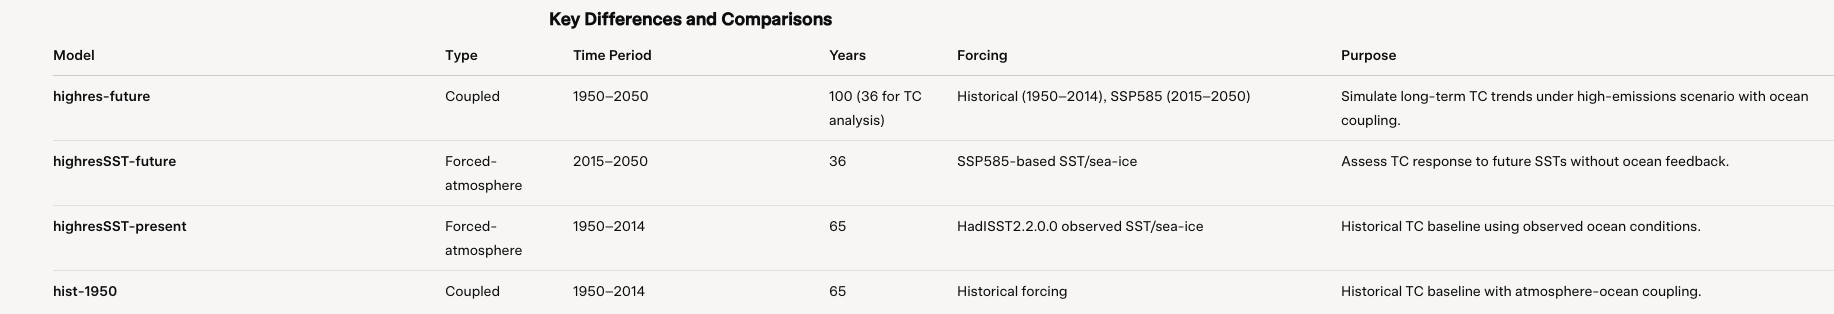

*   **Coupled vs. Forced-Atmosphere**: Coupled models (highres-future, hist-1950) include ocean feedback, making them more realistic for long-term climate simulations but computationally intensive. Forced-atmosphere models (highresSST-future, highresSST-present) use prescribed SSTs, simplifying simulations but potentially overestimating TC intensity due to lack of ocean cooling.

*   **Historical vs. Future:**
Historical models (highresSST-present, hist-1950) validate model performance against observed TC data (1950–2014).
Future models (highres-future, highresSST-future) project TC changes under SSP585, critical for assessing climate change impacts in the Philippines.

*   **Time Periods**:
highresSST-present and hist-1950 cover 65 years, providing larger samples for TC statistics.
highres-future and highresSST-future focus on 2015–2050 (36 years), aligning with future climate projections.




# **0. Import Library and Shapefile**

In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

In [2]:
# Use a Philippines boundary shapefile
philippines_shapefile = "PHL_adm0.shp"
PH_BUFFER_SHAPEFILE = "PHL_1degree_buffer.shp"

philippines = gpd.read_file(philippines_shapefile)
philippines_buffer = gpd.read_file(PH_BUFFER_SHAPEFILE)

# **1. TempExt**

# **1.1 MPI-ESM1-2-XR**

# **highres-future**

In [3]:
# Define file paths
tc_shapefile = "MPI-ESM1-2-XR_highres-future_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.03
Category 1-2: 0.00
Category 3-5: 0.00


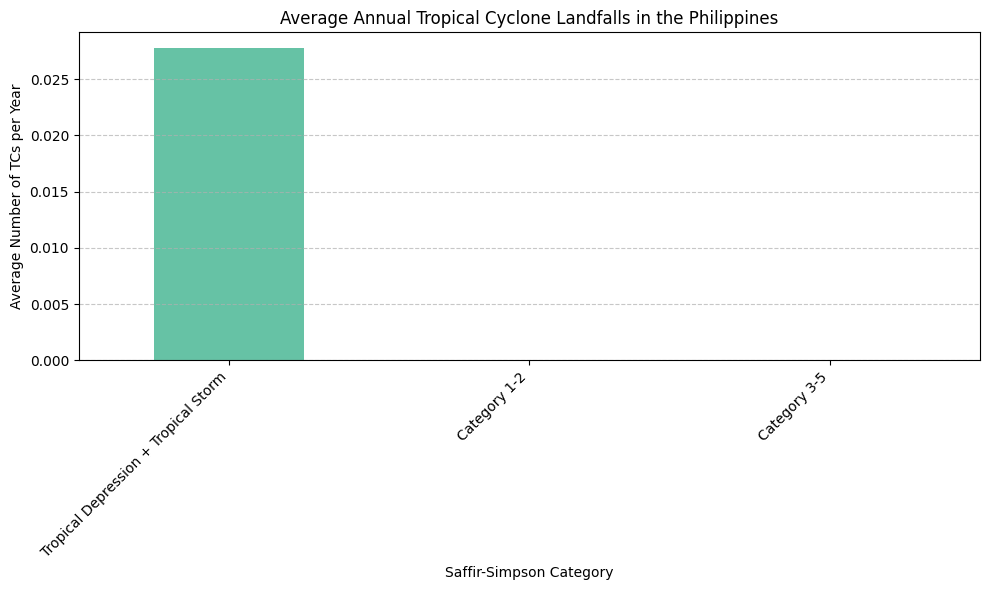

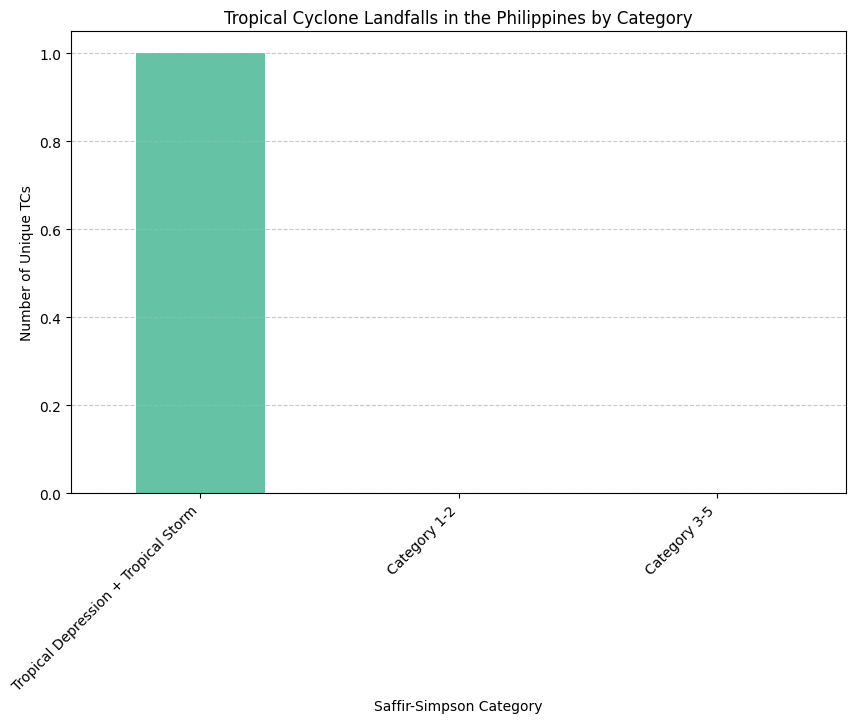

Number of unique tropical cyclones making landfall in the Philippines: 1
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 1
Category 1-2: 0
Category 3-5: 0


In [4]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts1 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2050 - 2015 + 1  # 36 years
avg_tcs_per_year1 = landfall_counts1 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year1.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year1.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts1.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts1.items():
    print(f"{category}: {count}")

# **highresSST-future**

In [5]:
# Define file paths
tc_shapefile = "MPI-ESM1-2-XR_highresSST-future_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.11
Category 1-2: 0.00
Category 3-5: 0.00


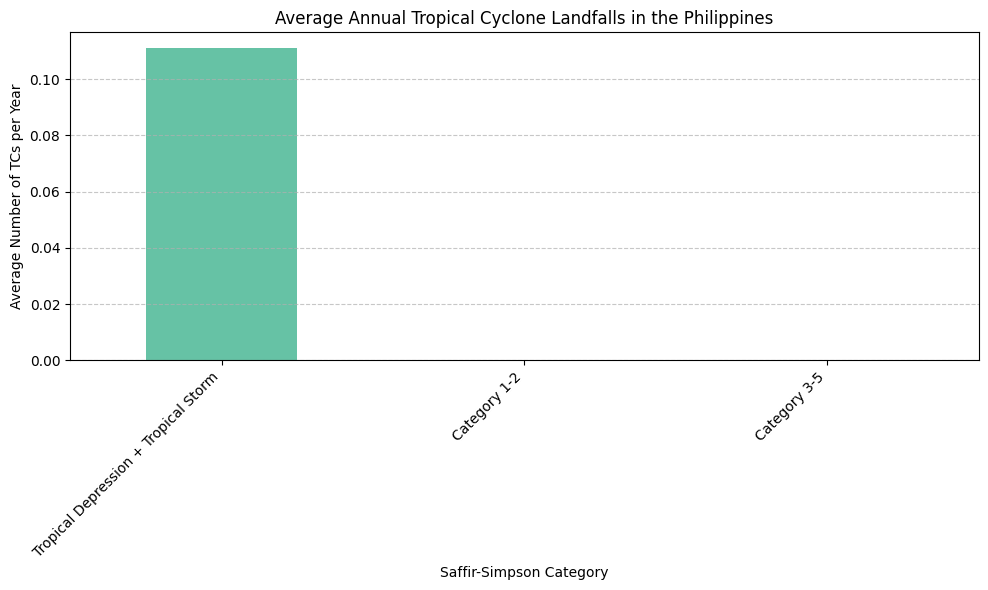

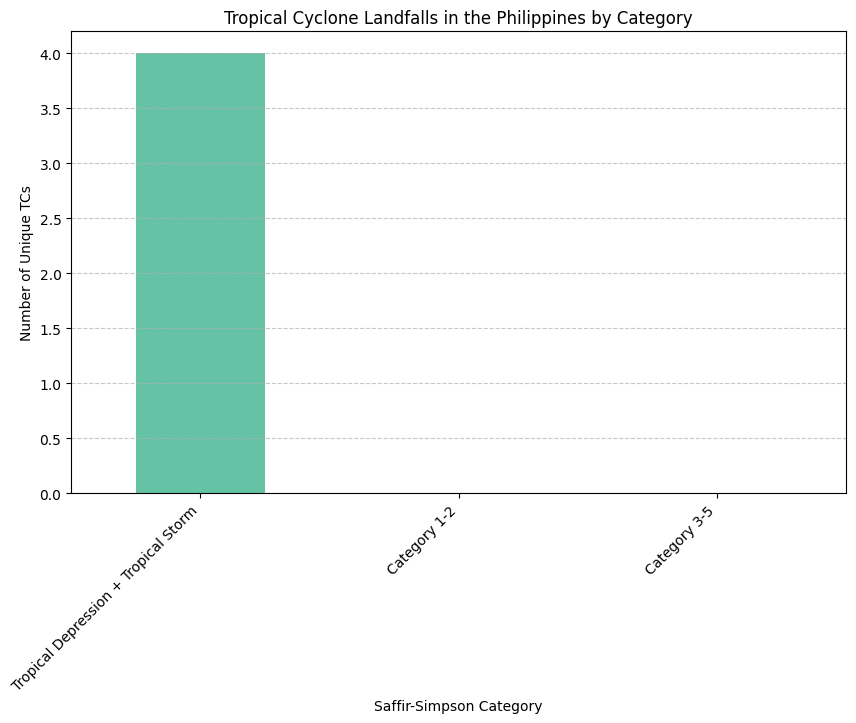

Number of unique tropical cyclones making landfall in the Philippines: 4
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 4
Category 1-2: 0
Category 3-5: 0


In [6]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts2 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2050 - 2015 + 1  # 36 years
avg_tcs_per_year2 = landfall_counts2 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year2.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year2.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts2.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts2.items():
    print(f"{category}: {count}")

# **highresSST-present**

In [7]:
# Define file paths
tc_shapefile = "MPI-ESM1-2-XR_highresSST-present_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.05
Category 1-2: 0.00
Category 3-5: 0.00


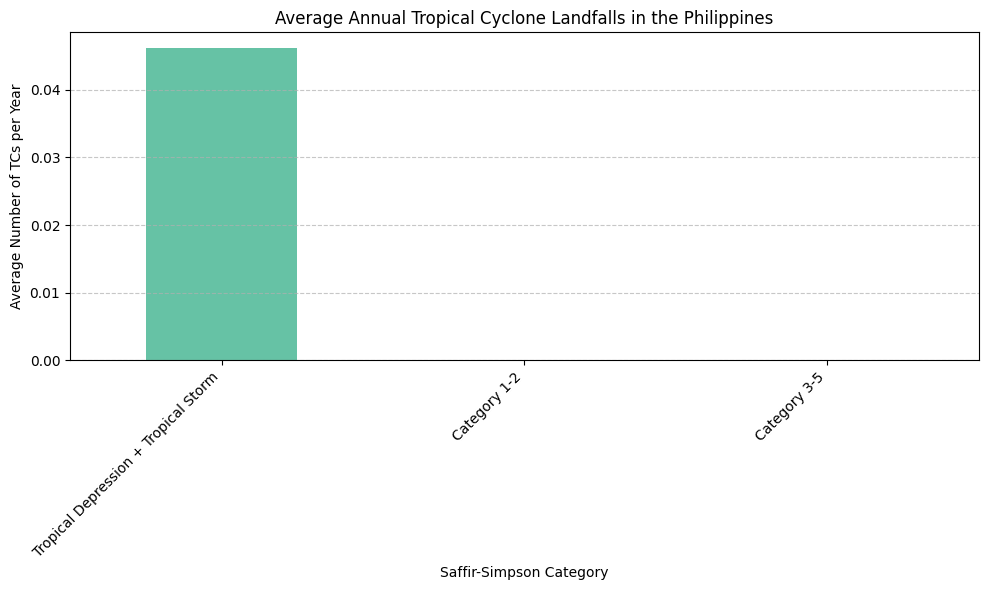

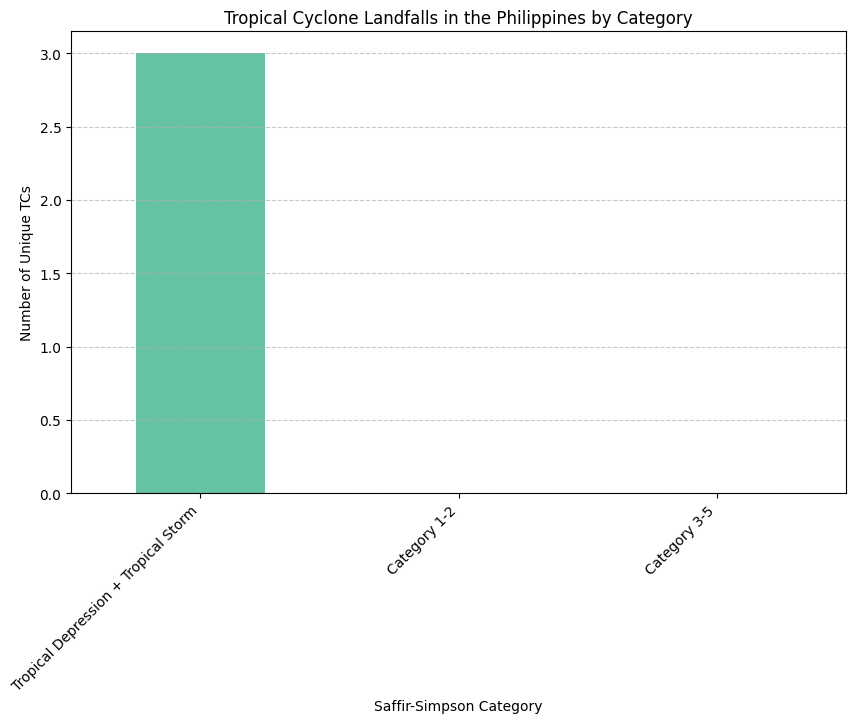

Number of unique tropical cyclones making landfall in the Philippines: 3
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 3
Category 1-2: 0
Category 3-5: 0


In [8]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts3 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year3 = landfall_counts3 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year3.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year3.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts3.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts3.items():
    print(f"{category}: {count}")

# **hist-1950**

In [9]:
# Define file paths
tc_shapefile = "MPI-ESM1-2-XR_hist-1950_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.05
Category 1-2: 0.00
Category 3-5: 0.00


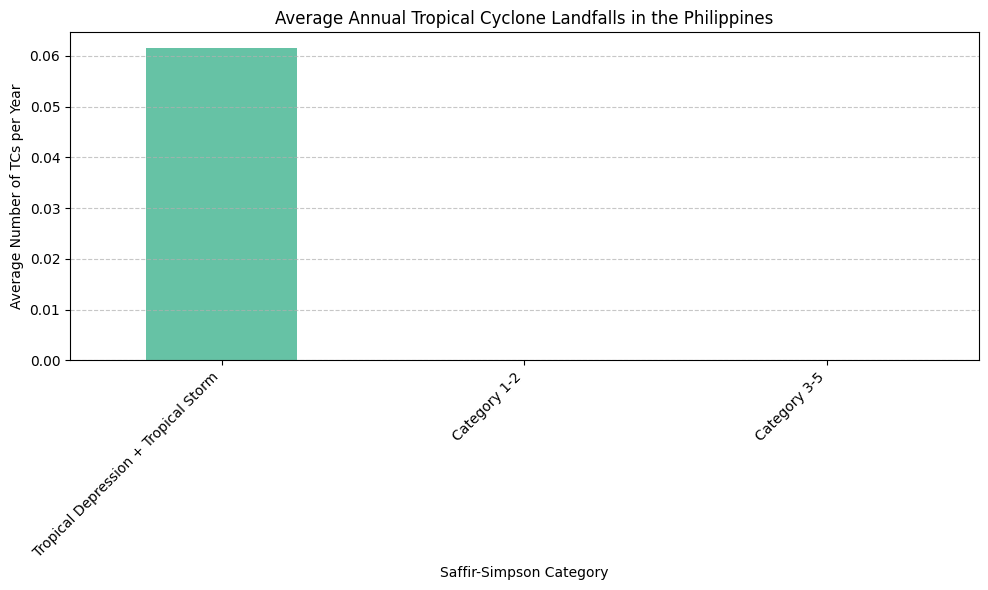

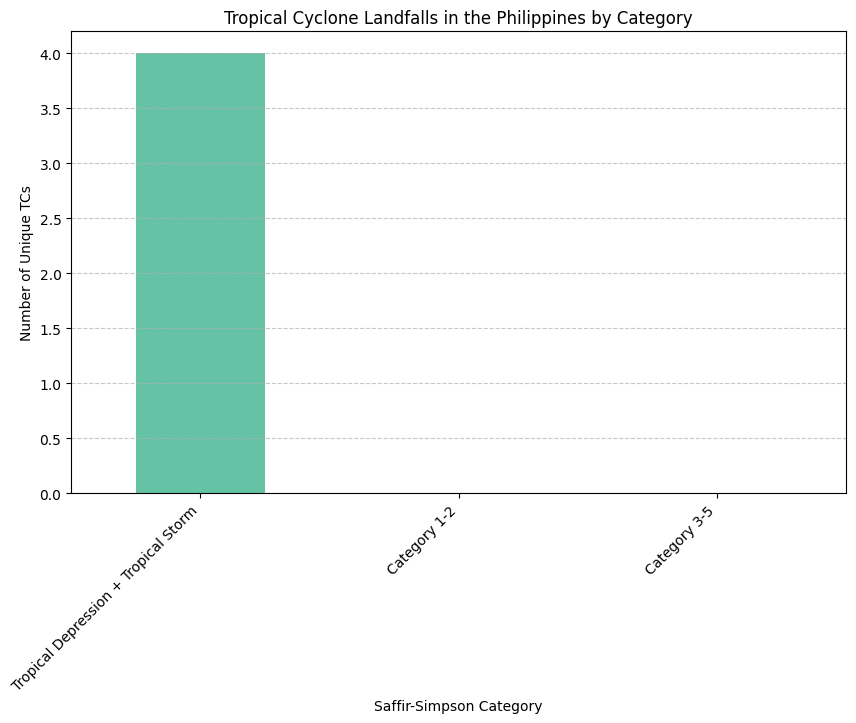

Number of unique tropical cyclones making landfall in the Philippines: 4
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 4
Category 1-2: 0
Category 3-5: 0


In [10]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts4 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year4 = landfall_counts4 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year3.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year4.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts4.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts4.items():
    print(f"{category}: {count}")

# **Result of MPI-ESM1-2-XR**

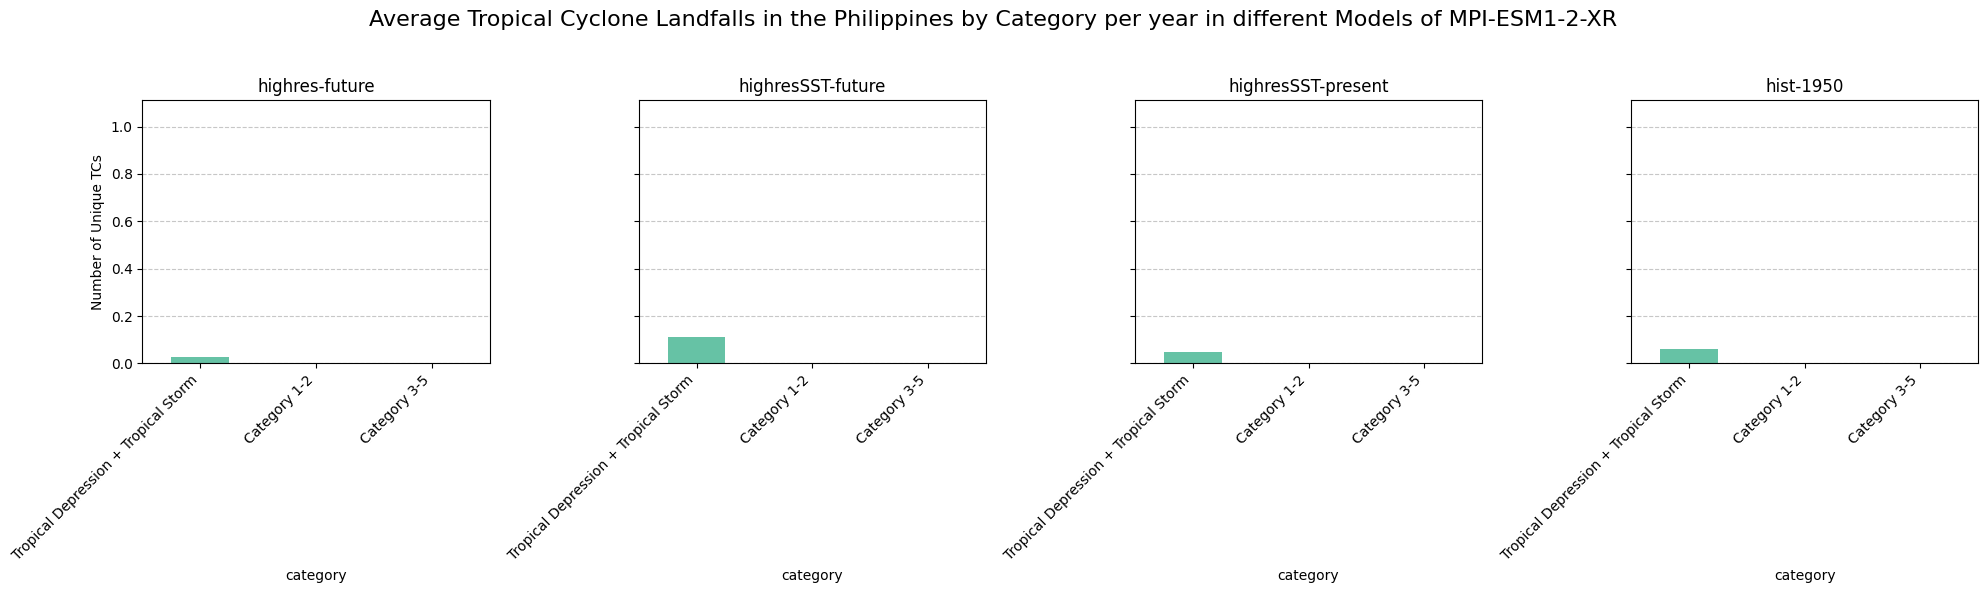

In [11]:
# List of landfall counts and their labels
avg_landfall_counts_list = [
    (avg_tcs_per_year1, "highres-future"),
    (avg_tcs_per_year2, "highresSST-future"),
    (avg_tcs_per_year3, "highresSST-present"),
    (avg_tcs_per_year4, "hist-1950")
]

# Create subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone Landfalls in the Philippines by Category per year in different Models of MPI-ESM1-2-XR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

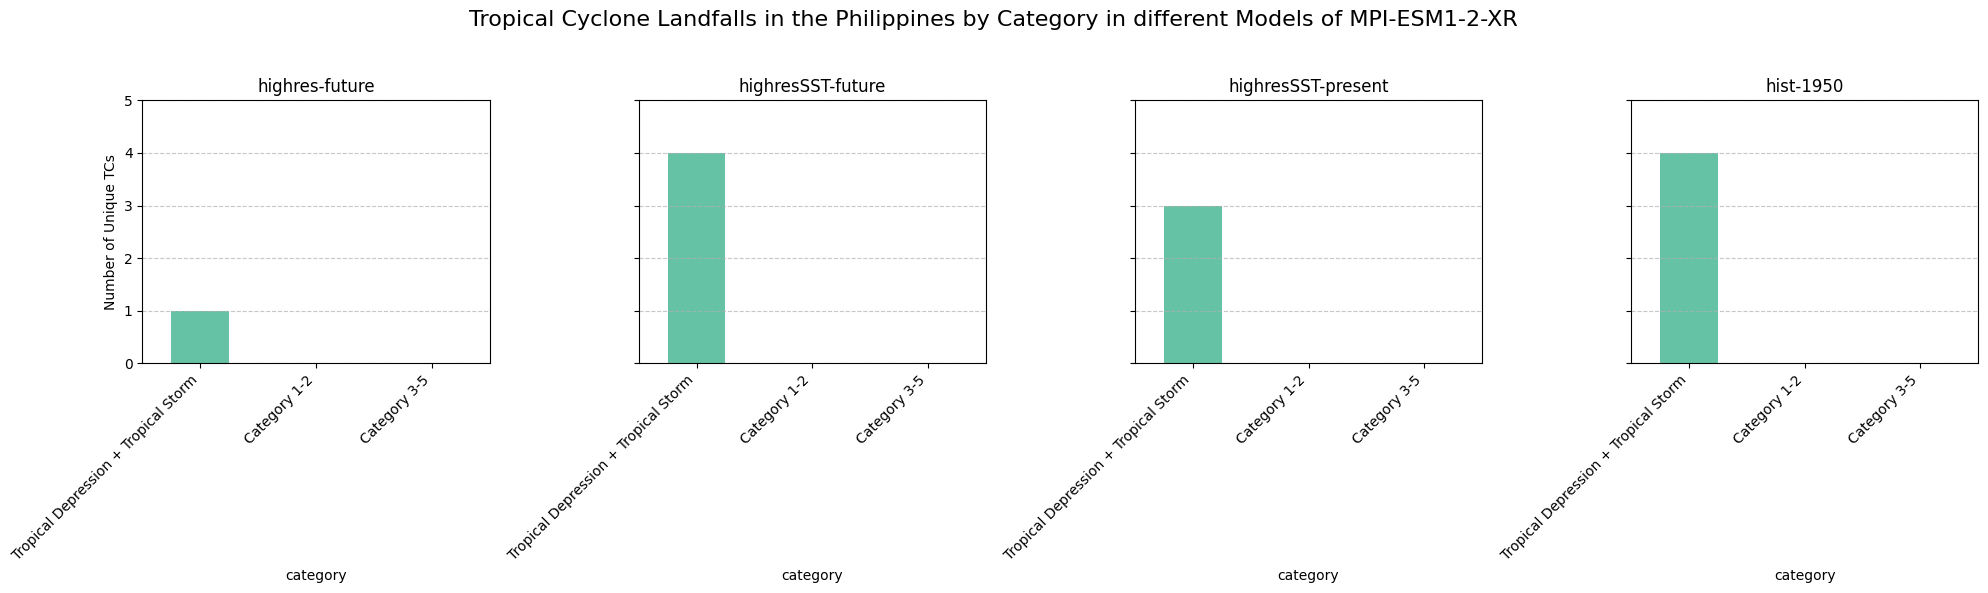

In [12]:
# List of landfall counts and their labels
landfall_counts_list = [
    (landfall_counts1, "highres-future"),
    (landfall_counts2, "highresSST-future"),
    (landfall_counts3, "highresSST-present"),
    (landfall_counts4, "hist-1950")
]

# Create subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Tropical Cyclone Landfalls in the Philippines by Category in different Models of MPI-ESM1-2-XR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [13]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("highres-future", landfall_counts1, avg_tcs_per_year1),
    ("highresSST-future", landfall_counts2, avg_tcs_per_year2),
    ("highresSST-present", landfall_counts3, avg_tcs_per_year3),
    ("hist-1950", landfall_counts4, avg_tcs_per_year4)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of MPI-ESM1-2-XR.csv', index=False)
print("\nData saved to 'Result of MPI-ESM1-2-XR.csv'")


Data saved to 'Result of MPI-ESM1-2-XR.csv'


# **1.2 HadGem3-GC31-HH**

# **highres-future**

In [14]:
# Define file paths
tc_shapefile = "HadGEM3-GC31-HH_highres-future_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 1.42
Category 1-2: 0.03
Category 3-5: 0.00


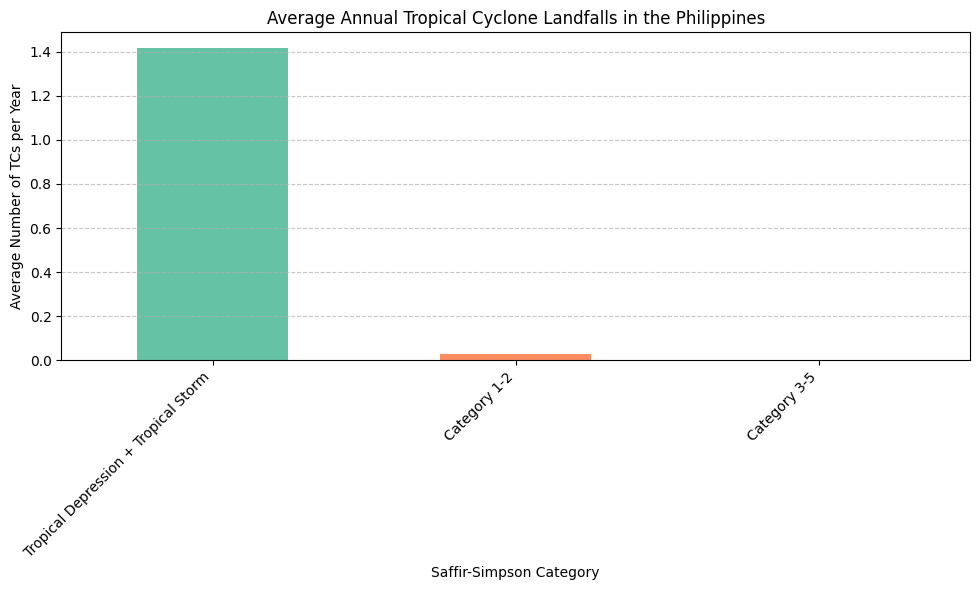

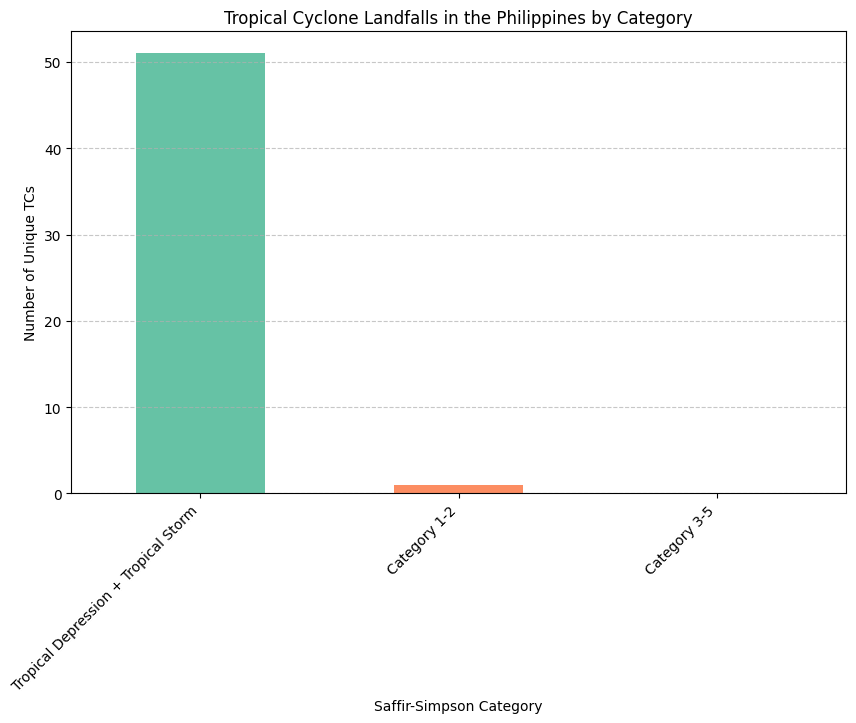

Number of unique tropical cyclones making landfall in the Philippines: 52
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 51
Category 1-2: 1
Category 3-5: 0


In [15]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts5 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2050 - 2015 + 1  # 36 years
avg_tcs_per_year5 = landfall_counts5 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year5.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year5.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts5.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts5.items():
    print(f"{category}: {count}")

# **hist-1950**

In [16]:
# Define file paths
tc_shapefile = "HadGEM3-GC31-HH_hist-1950_r1i1p1f1_gn_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 1.40
Category 1-2: 0.12
Category 3-5: 0.06


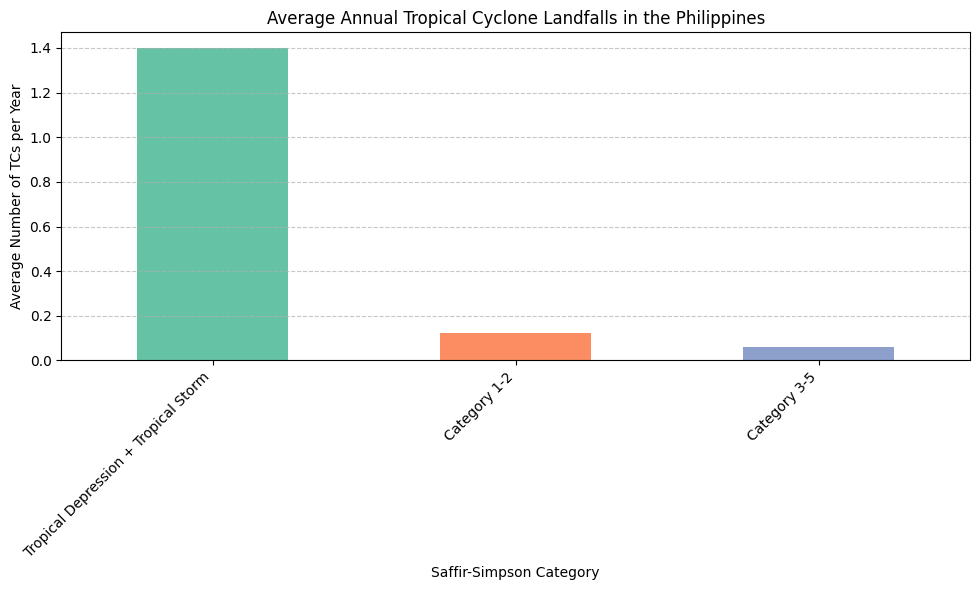

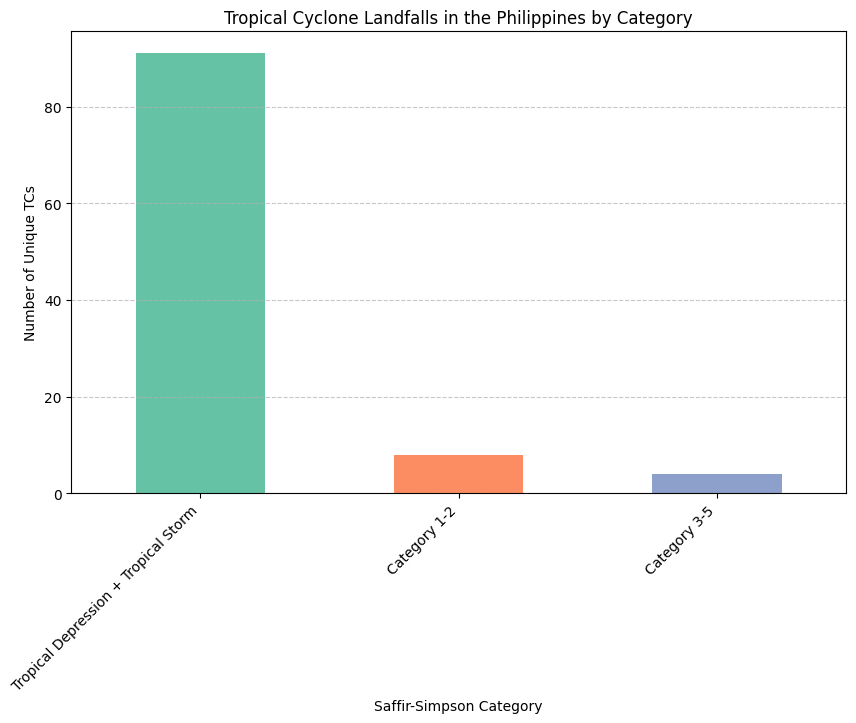

Number of unique tropical cyclones making landfall in the Philippines: 103
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 4
Category 1-2: 0
Category 3-5: 0


In [17]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts6 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65 years
avg_tcs_per_year6 = landfall_counts6 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year6.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year6.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts6.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts2.items():
    print(f"{category}: {count}")

# **Result of HadGem3-GC31-HH**

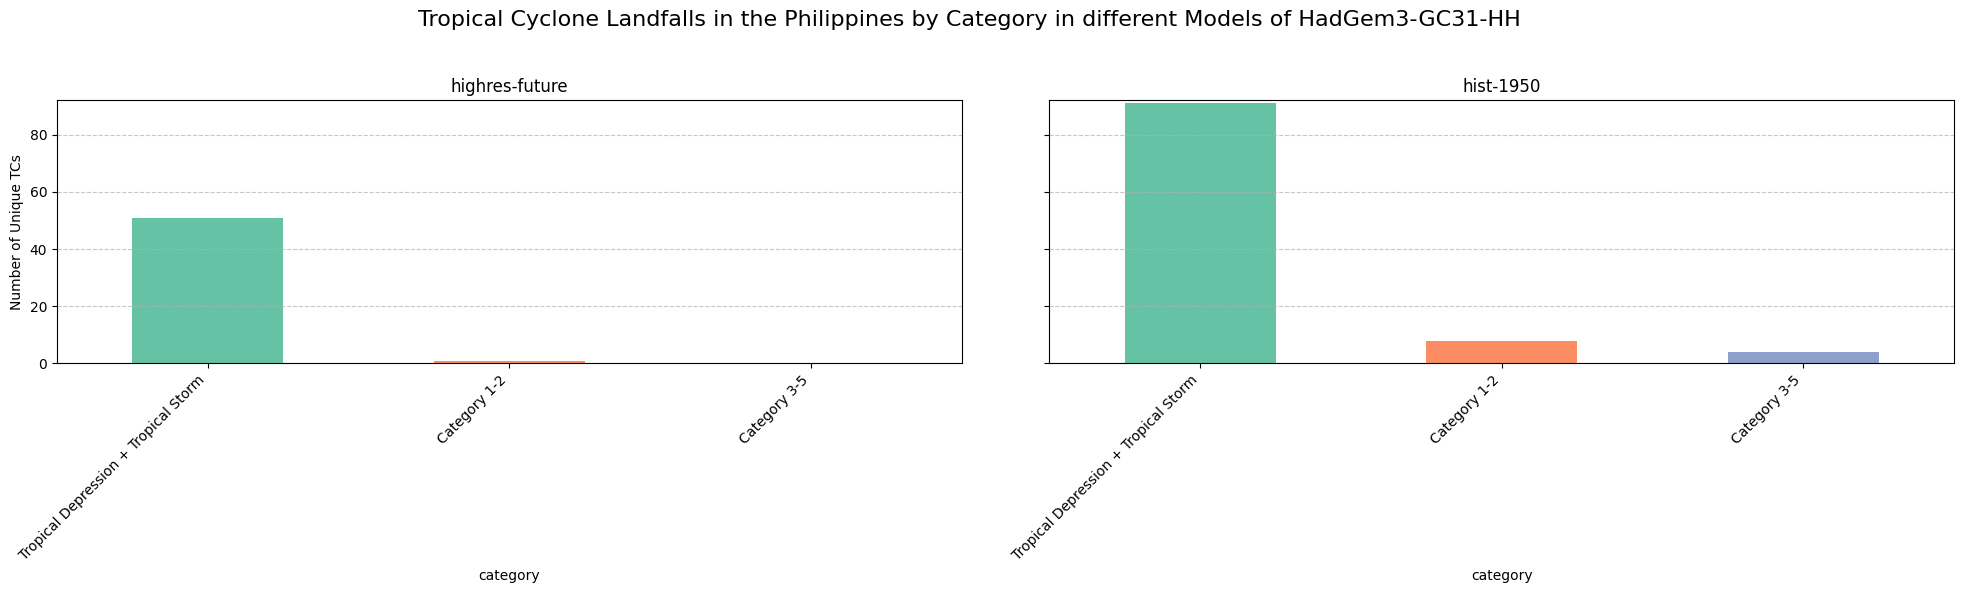

In [18]:
# List of landfall counts and their labels
landfall_counts_list = [
    (landfall_counts5, "highres-future"),
    (landfall_counts6, "hist-1950")
]

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Tropical Cyclone Landfalls in the Philippines by Category in different Models of HadGem3-GC31-HH', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

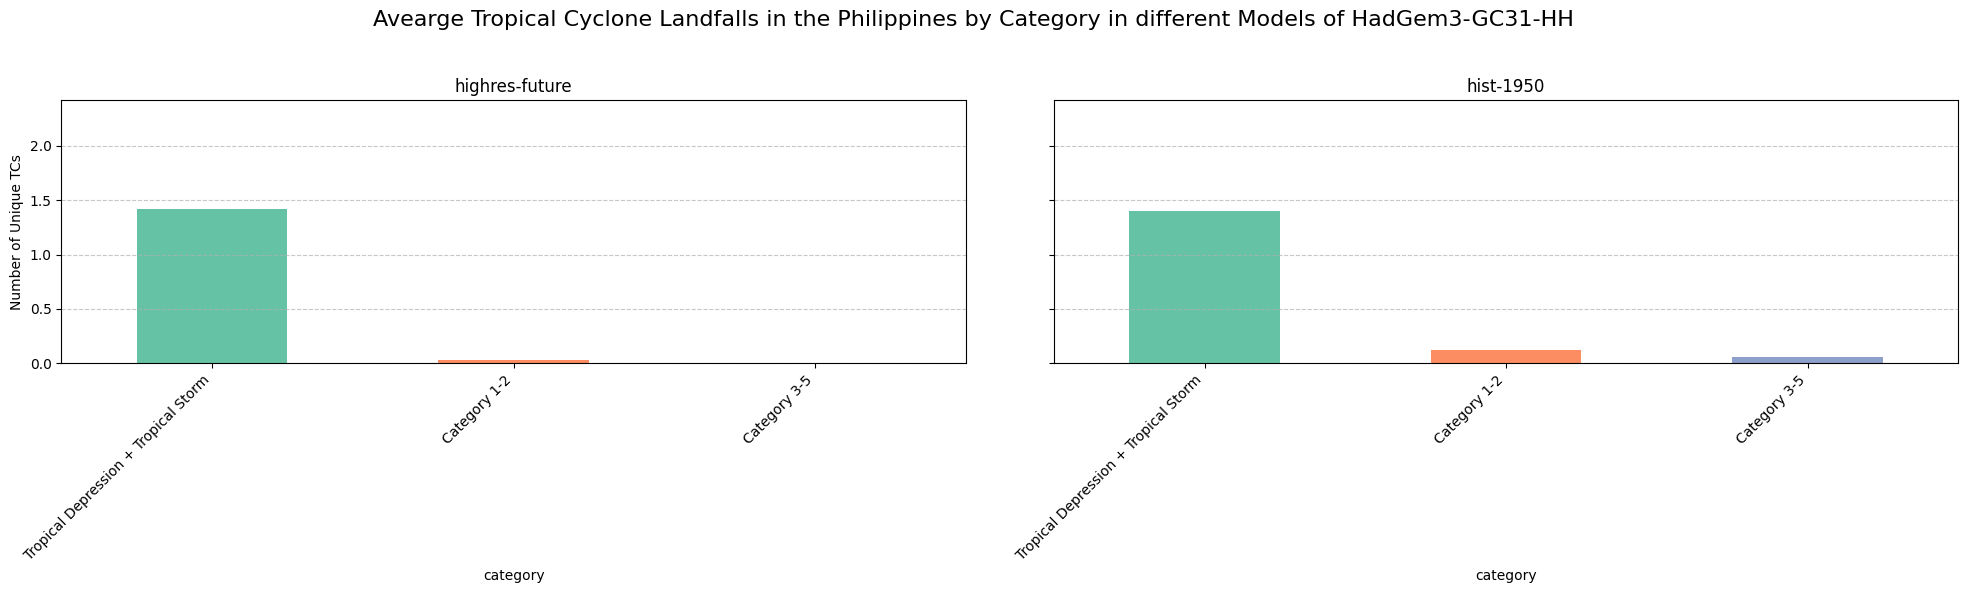

In [19]:
# List of landfall counts and their labels
avg_landfall_counts_list = [
    (avg_tcs_per_year5, "highres-future"),
    (avg_tcs_per_year6, "hist-1950")
]

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Avearge Tropical Cyclone Landfalls in the Philippines by Category in different Models of HadGem3-GC31-HH', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [20]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]
for dataset, counts, avg in [
    ("highres-future", landfall_counts5, avg_tcs_per_year5),
    ("hist-1950", landfall_counts6, avg_tcs_per_year6)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of HadGem3-GC31-HH.csv', index=False)
print("\nData saved to 'Result of HadGem3-GC31-HH.csv'")



Data saved to 'Result of HadGem3-GC31-HH.csv'


# **1.3 ECMWF-IFS-HR**

# **highresSST-present**

**Round 1**

In [21]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_highresSST-present_r1i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.38
Category 1-2: 0.05
Category 3-5: 0.00


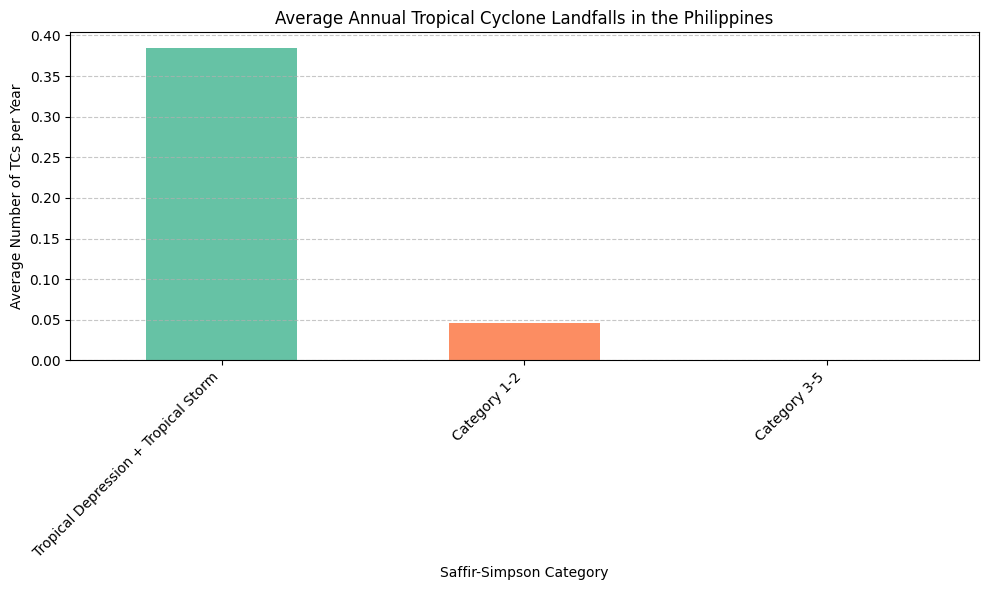

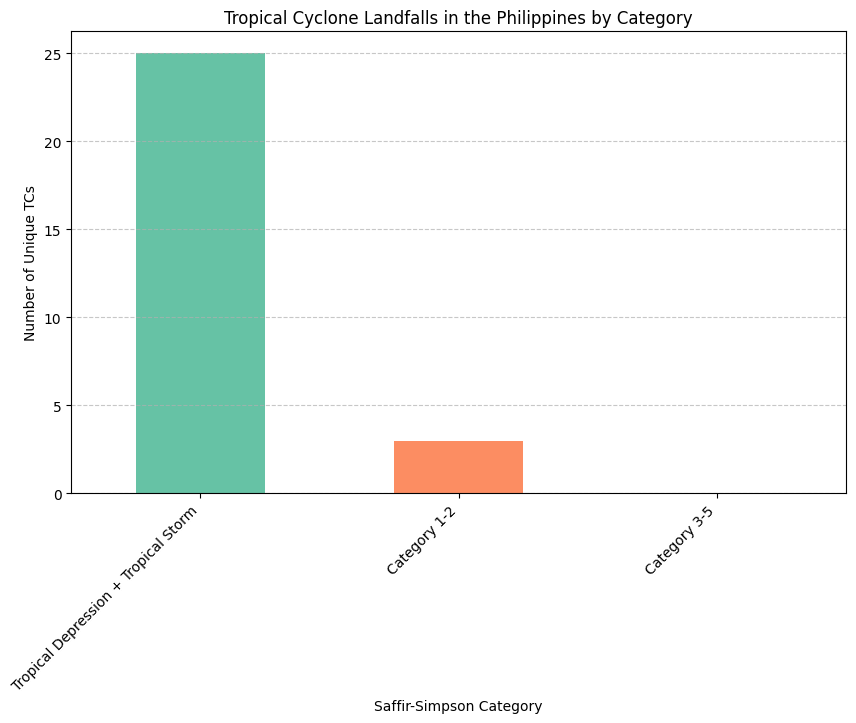

Number of unique tropical cyclones making landfall in the Philippines: 28
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 1
Category 1-2: 0
Category 3-5: 0


In [22]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts7 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65years
avg_tcs_per_year7 = landfall_counts7 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year7.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year7.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts7.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts1.items():
    print(f"{category}: {count}")

**Round 5**

In [23]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_highresSST-present_r5i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.34
Category 1-2: 0.03
Category 3-5: 0.02


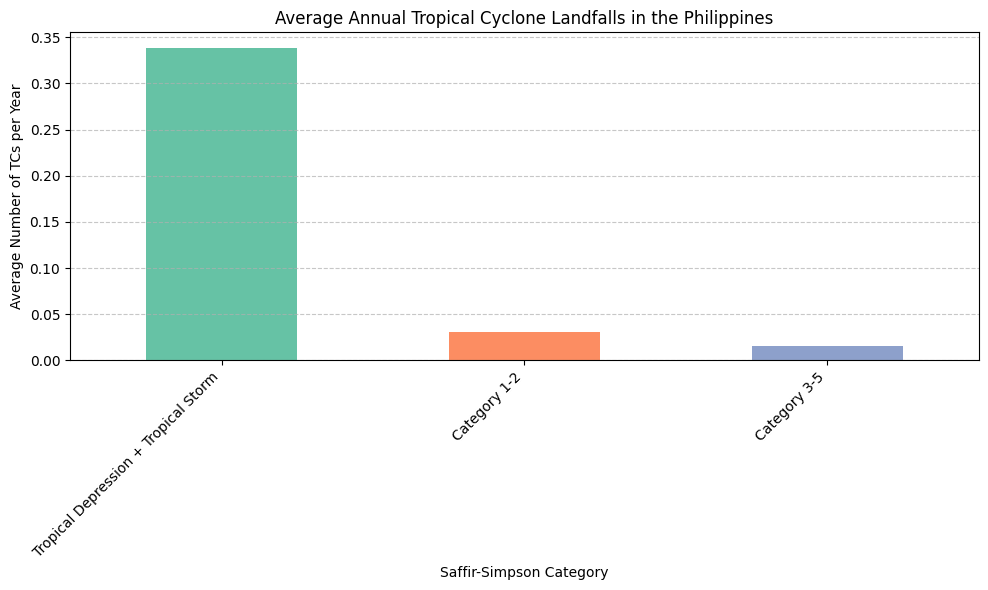

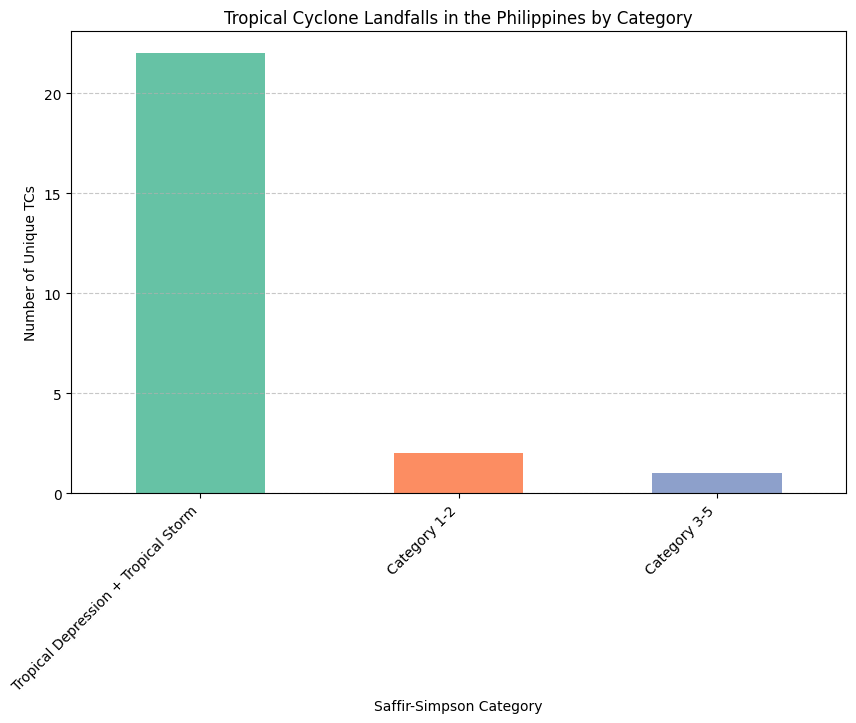

Number of unique tropical cyclones making landfall in the Philippines: 25
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 4
Category 1-2: 0
Category 3-5: 0


In [24]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts8 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65years
avg_tcs_per_year8 = landfall_counts8 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year8.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year8.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts8.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts2.items():
    print(f"{category}: {count}")

**Round 6**

In [25]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_highresSST-present_r6i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.31
Category 1-2: 0.02
Category 3-5: 0.05


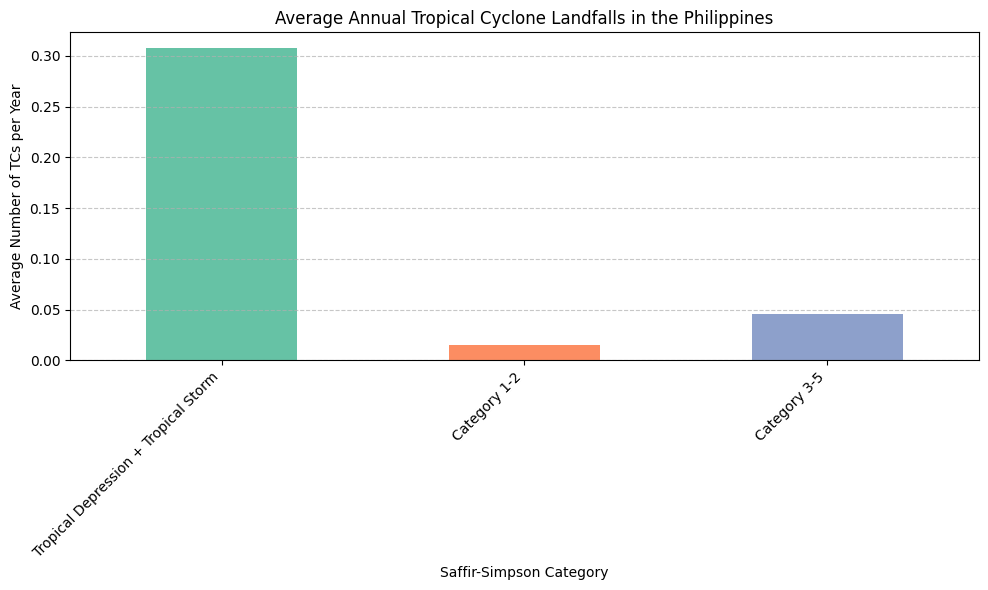

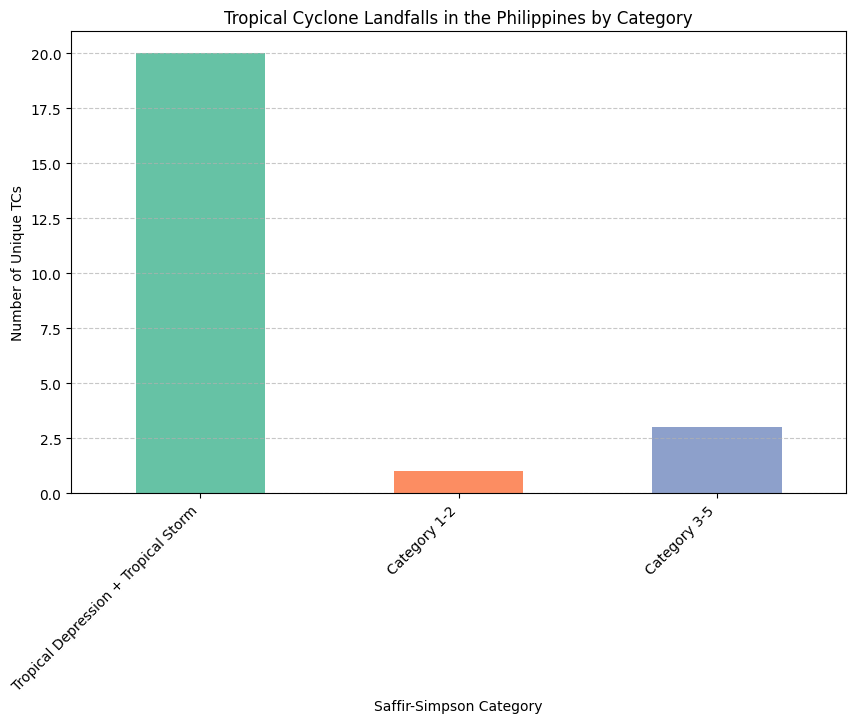

Number of unique tropical cyclones making landfall in the Philippines: 24
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 3
Category 1-2: 0
Category 3-5: 0


In [26]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts9 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65years
avg_tcs_per_year9 = landfall_counts9 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year9.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year9.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts9.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts3.items():
    print(f"{category}: {count}")

# **hist-1950**

**round 1**

In [27]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_hist-1950_r1i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.05
Category 1-2: 0.00
Category 3-5: 0.00


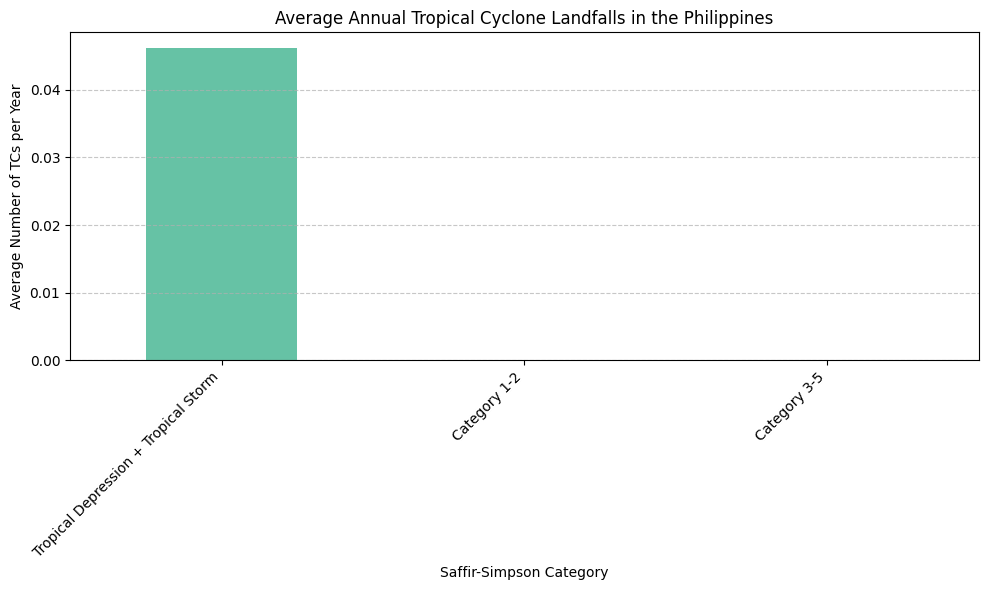

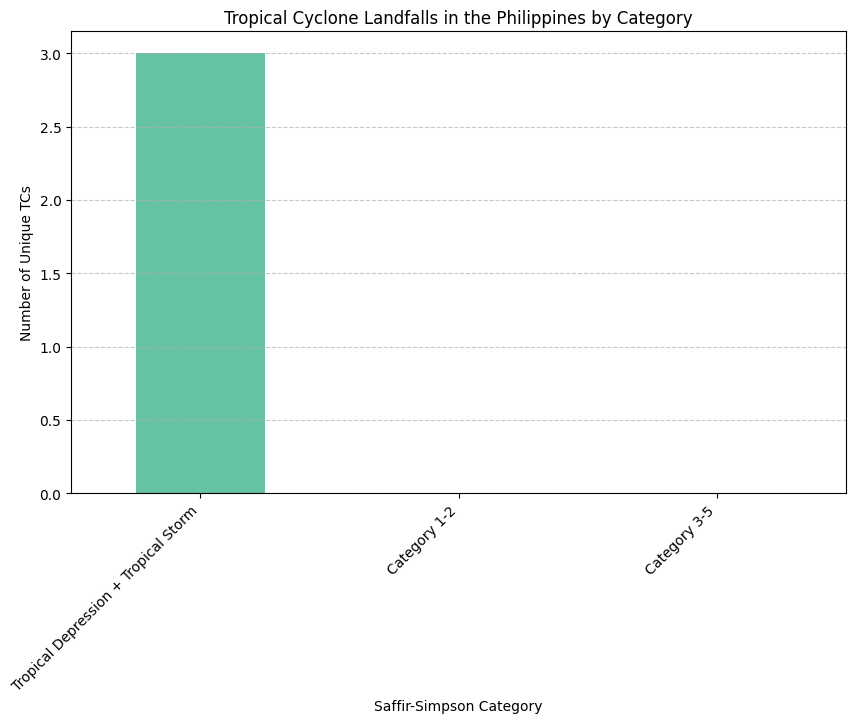

Number of unique tropical cyclones making landfall in the Philippines: 3
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 4
Category 1-2: 0
Category 3-5: 0


In [28]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts10 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65years
avg_tcs_per_year10 = landfall_counts10 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year10.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year10.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts10.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts4.items():
    print(f"{category}: {count}")

**round 5**

In [29]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_hist-1950_r5i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.11
Category 1-2: 0.00
Category 3-5: 0.00


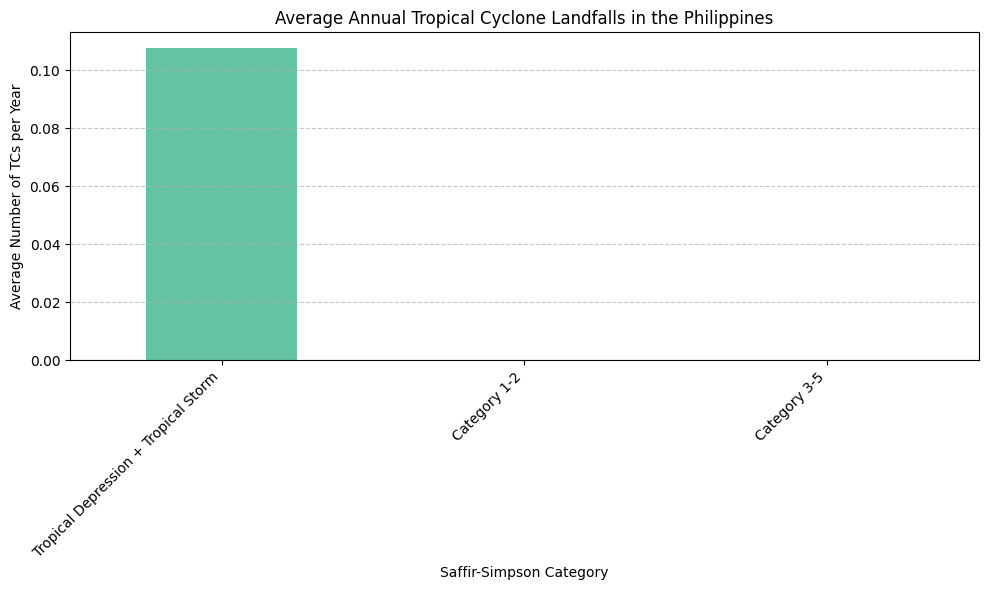

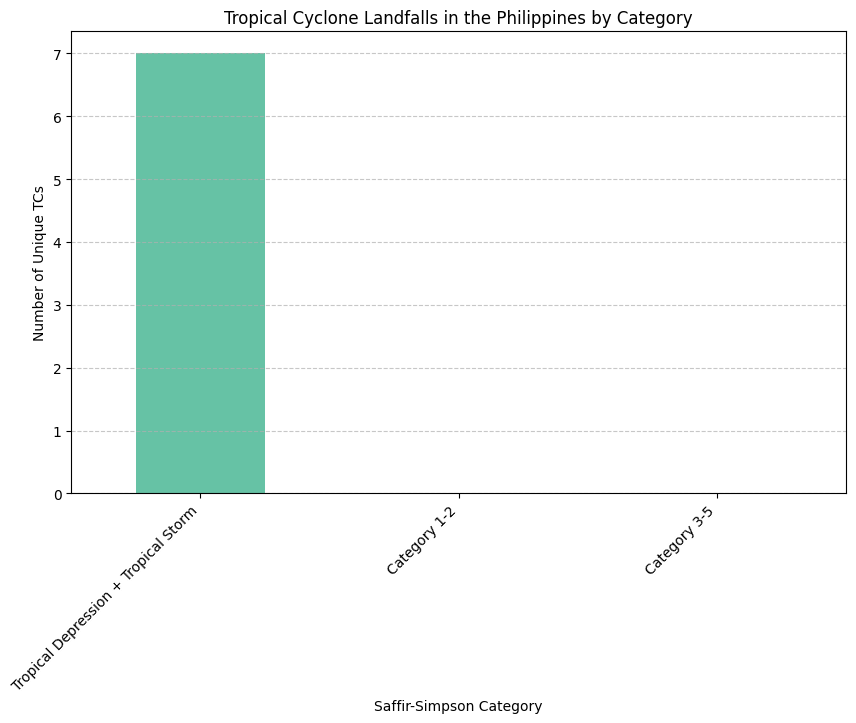

Number of unique tropical cyclones making landfall in the Philippines: 7
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 51
Category 1-2: 1
Category 3-5: 0


In [30]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts11 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65years
avg_tcs_per_year11 = landfall_counts11 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year11.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year11.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts11.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts5.items():
    print(f"{category}: {count}")

**Round 6**

In [31]:
# Define file paths
tc_shapefile = "ECMWF-IFS-HR_hist-1950_r6i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.03
Category 1-2: 0.00
Category 3-5: 0.00


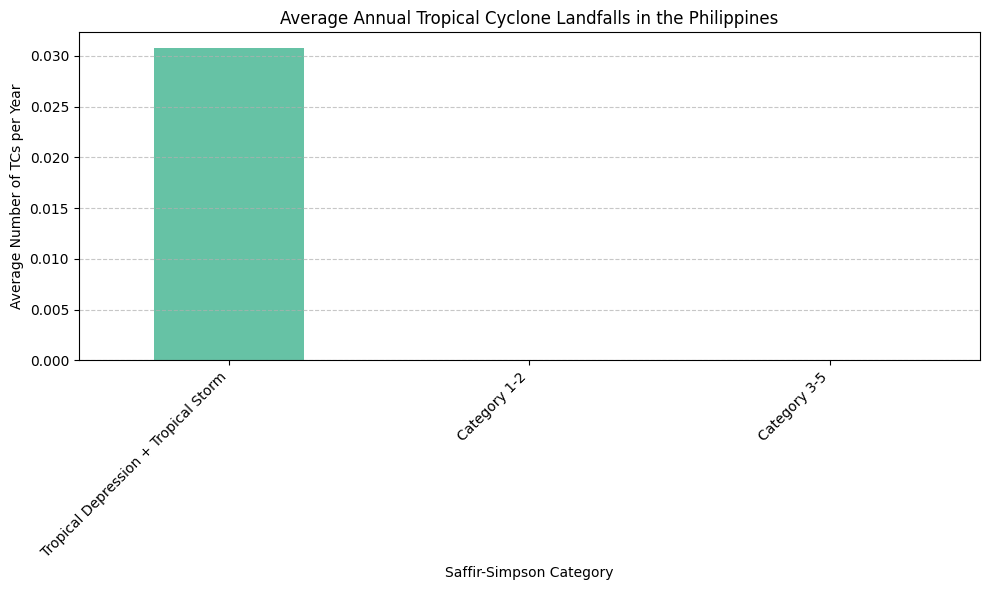

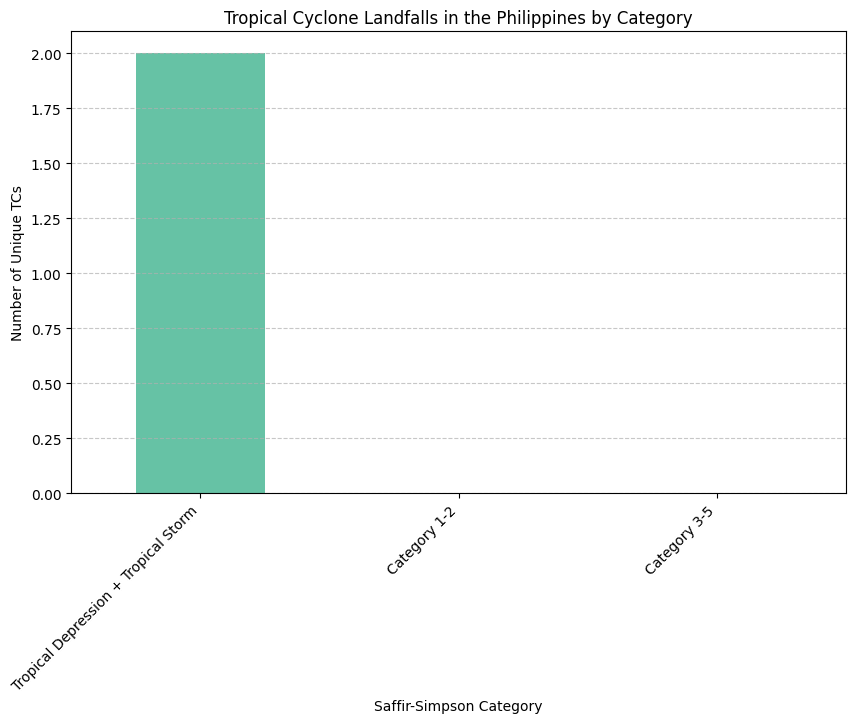

Number of unique tropical cyclones making landfall in the Philippines: 2
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 91
Category 1-2: 8
Category 3-5: 4


In [32]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts12 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65years
avg_tcs_per_year12 = landfall_counts12 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year12.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year12.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts12.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts6.items():
    print(f"{category}: {count}")

# **Result of ECMWF-IFS-HR**

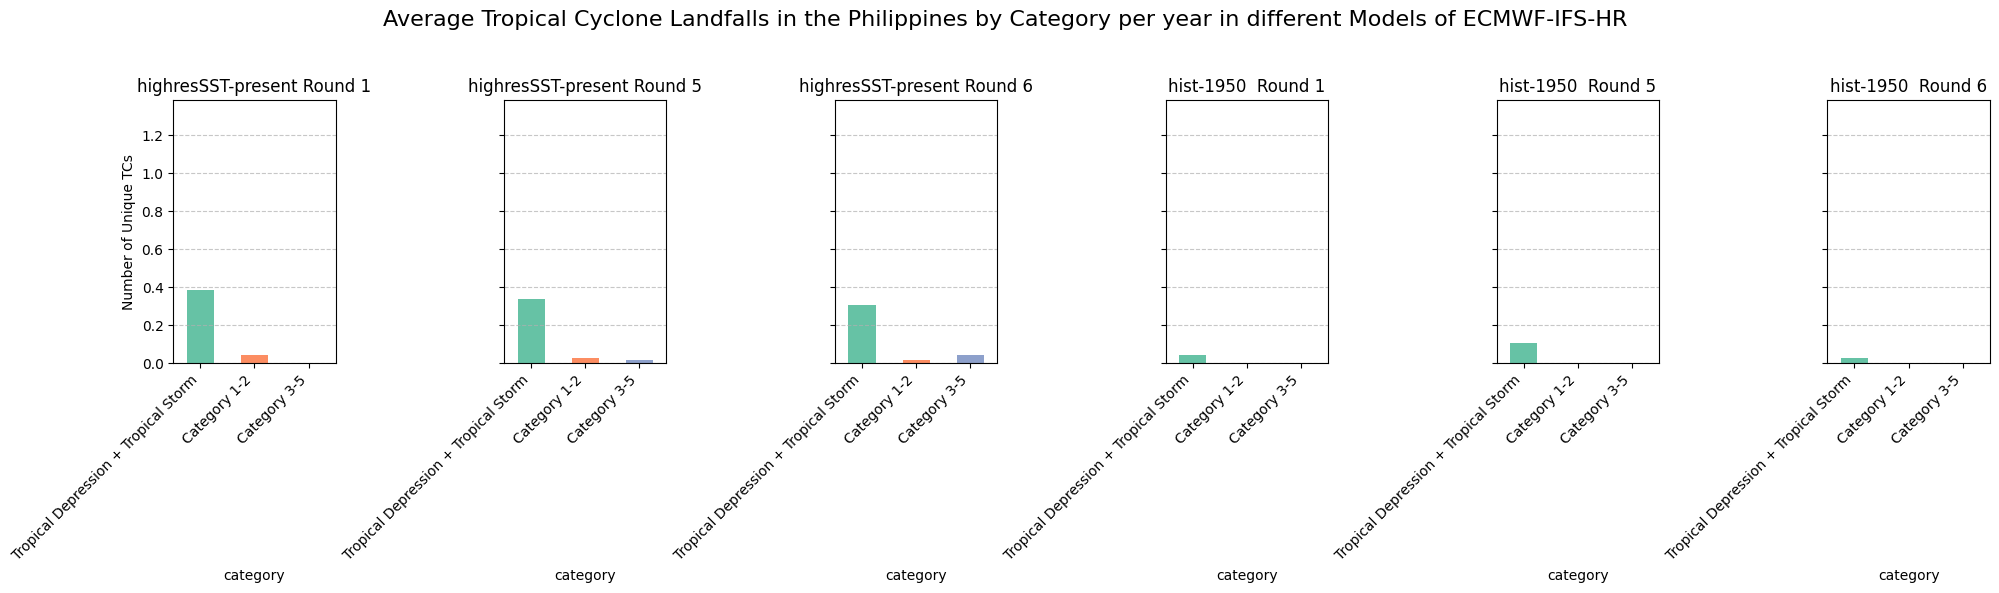

In [33]:
# List of landfall counts and their labels
landfall_counts_list = [
    (avg_tcs_per_year7, "highresSST-present Round 1"),
    (avg_tcs_per_year8, "highresSST-present Round 5"),
    (avg_tcs_per_year9, "highresSST-present Round 6"),
    (avg_tcs_per_year10, "hist-1950  Round 1"),
    (avg_tcs_per_year11, "hist-1950  Round 5"),
    (avg_tcs_per_year12, "hist-1950  Round 6")
]

# Create subplots (1 row, 6 columns)
fig, axes = plt.subplots(1, 6, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone Landfalls in the Philippines by Category per year in different Models of ECMWF-IFS-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

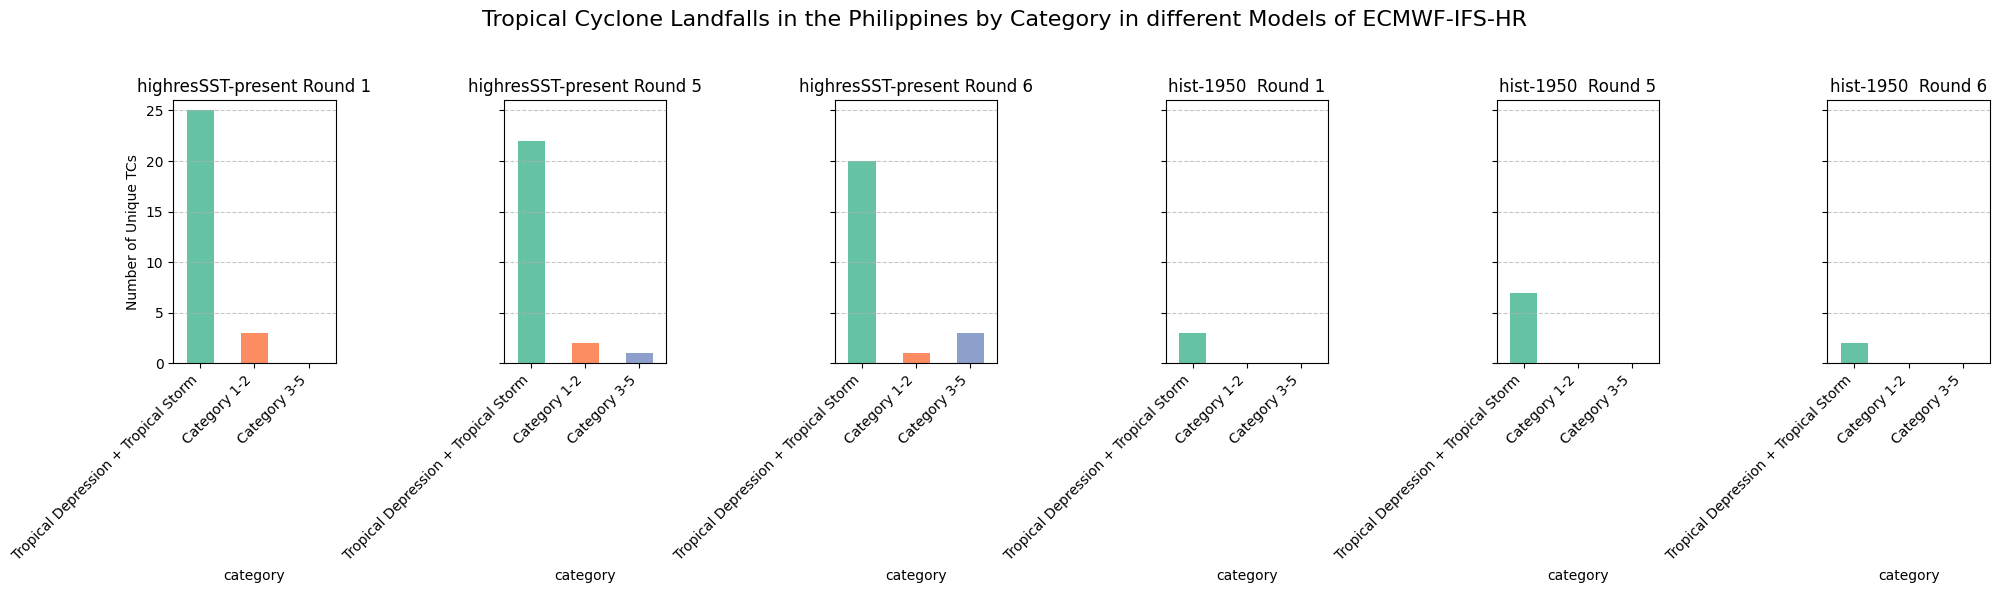

In [34]:
avg_landfall_counts_list = [
    (landfall_counts7, "highresSST-present Round 1"),
    (landfall_counts8, "highresSST-present Round 5"),
    (landfall_counts9, "highresSST-present Round 6"),
    (landfall_counts10, "hist-1950  Round 1"),
    (landfall_counts11, "hist-1950  Round 5"),
    (landfall_counts12, "hist-1950  Round 6")
]

# Create subplots (1 row, 6 columns)
fig, axes = plt.subplots(1, 6, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Tropical Cyclone Landfalls in the Philippines by Category in different Models of ECMWF-IFS-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [35]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]



for dataset, counts, avg in [
    ("highresSST-present Round 1", landfall_counts7, avg_tcs_per_year7),
    ("highresSST-present Round 5", landfall_counts8, avg_tcs_per_year8),
    ("highresSST-present Round 6", landfall_counts9, avg_tcs_per_year9),
    ("hist-1950  Round 1", landfall_counts10, avg_tcs_per_year10),
    ("hist-1950  Round 5", landfall_counts11, avg_tcs_per_year11),
    ("hist-1950  Round 6", landfall_counts12, avg_tcs_per_year12),

]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of ECMWF-IFS-HR.csv', index=False)
print("\nData saved to 'Result of ECMWF-IFS-HR.csv' ")


Data saved to 'Result of ECMWF-IFS-HR.csv' 


# **1.4 EC-EARTH3P-HR**

# **hist-1950**

**round 1**

In [36]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_hist-1950_r1i1p2f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.17
Category 1-2: 0.00
Category 3-5: 0.00


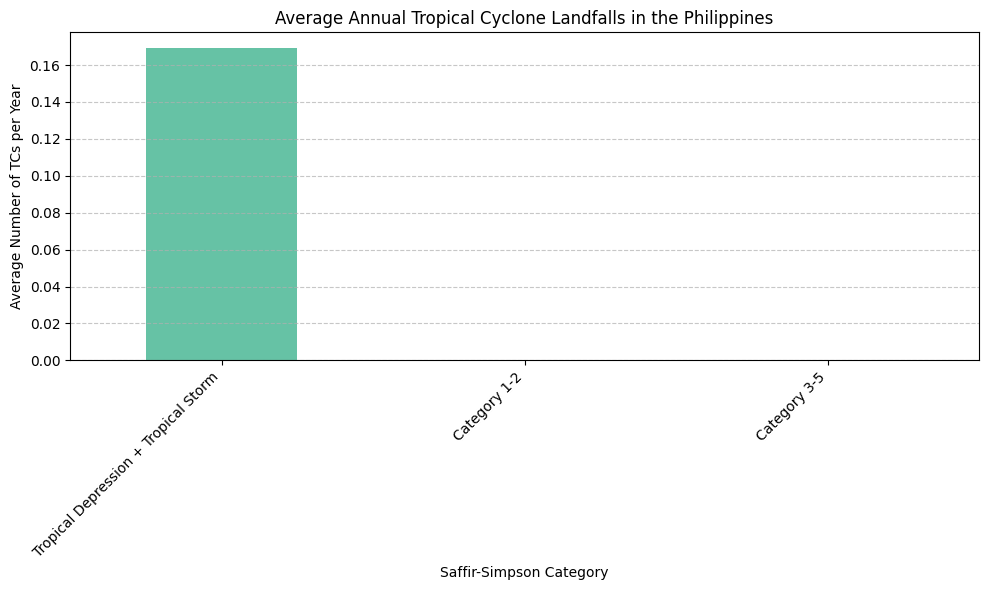

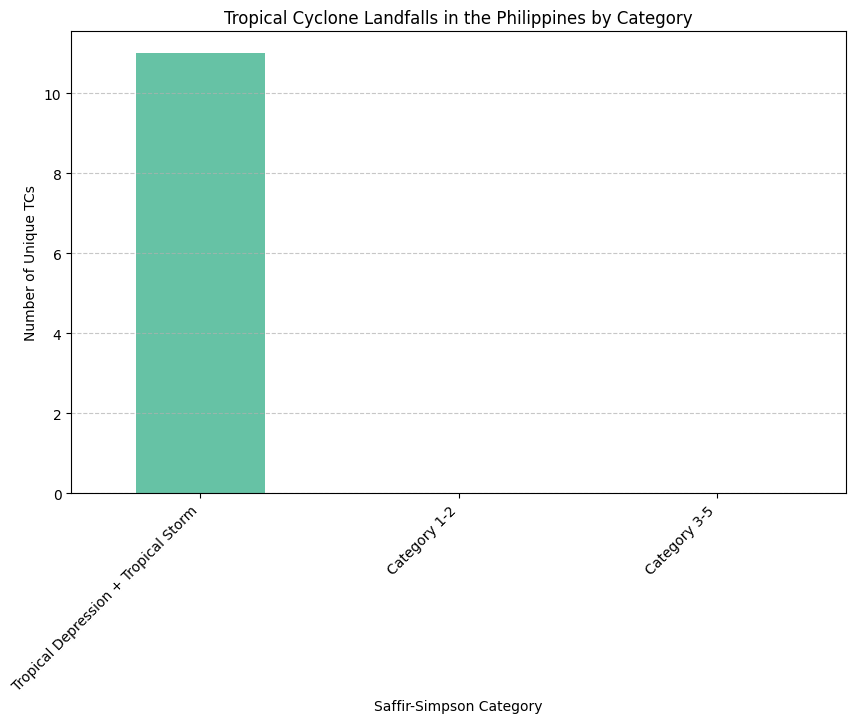

Number of unique tropical cyclones making landfall in the Philippines: 11
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 1
Category 1-2: 0
Category 3-5: 0


In [37]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts13 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65years
avg_tcs_per_year13 = landfall_counts13 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year13.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year13.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts13.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts1.items():
    print(f"{category}: {count}")

**round 2**

In [38]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_hist-1950_r2i1p2f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.15
Category 1-2: 0.00
Category 3-5: 0.00


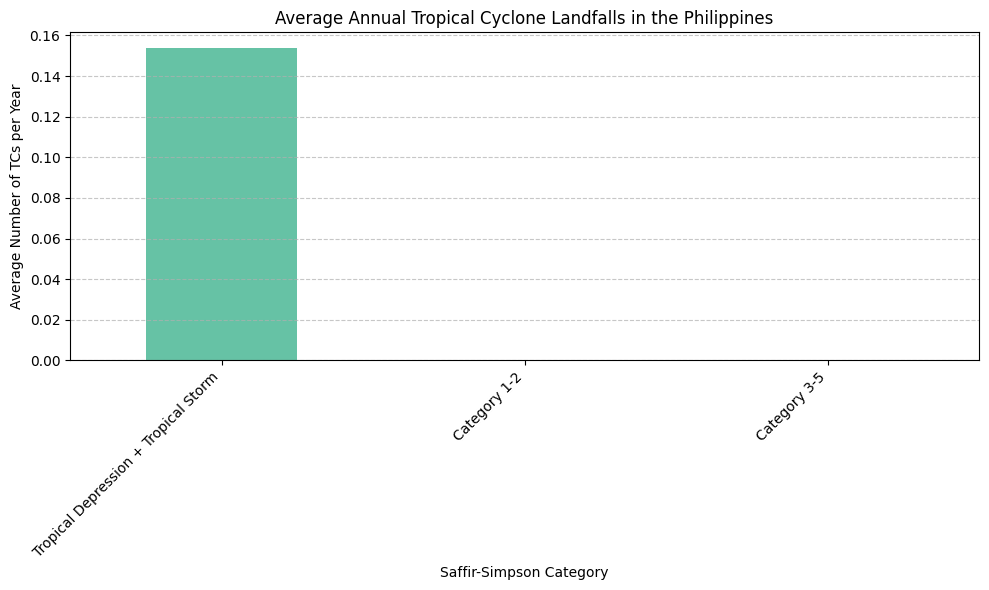

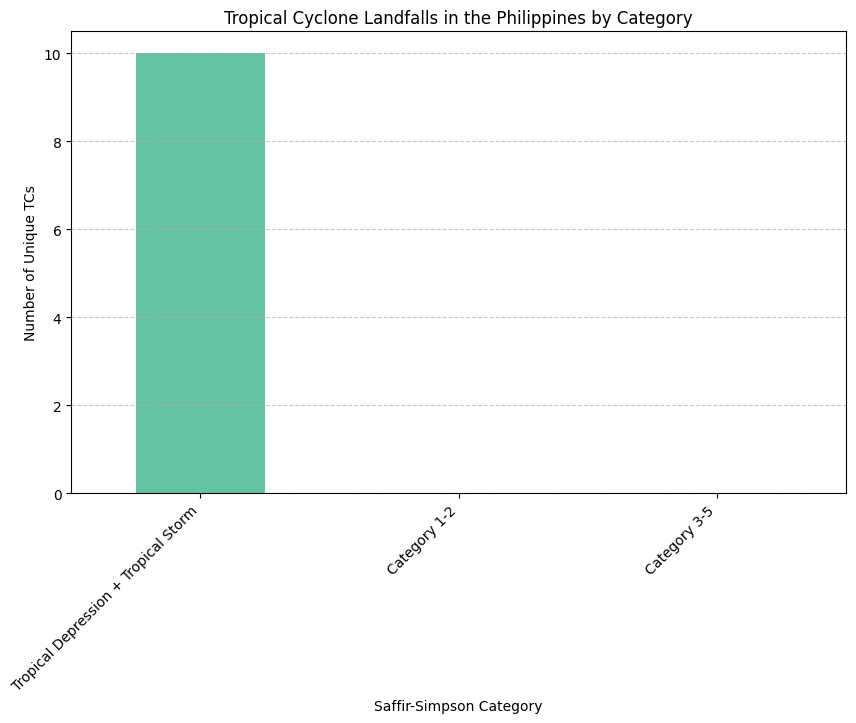

Number of unique tropical cyclones making landfall in the Philippines: 10
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 4
Category 1-2: 0
Category 3-5: 0


In [39]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts14 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65years
avg_tcs_per_year14 = landfall_counts14 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year14.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year14.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts14.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts2.items():
    print(f"{category}: {count}")

# **highresSST-present**

**round 1**

In [40]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highresSST-present_r1i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.09
Category 1-2: 0.00
Category 3-5: 0.00


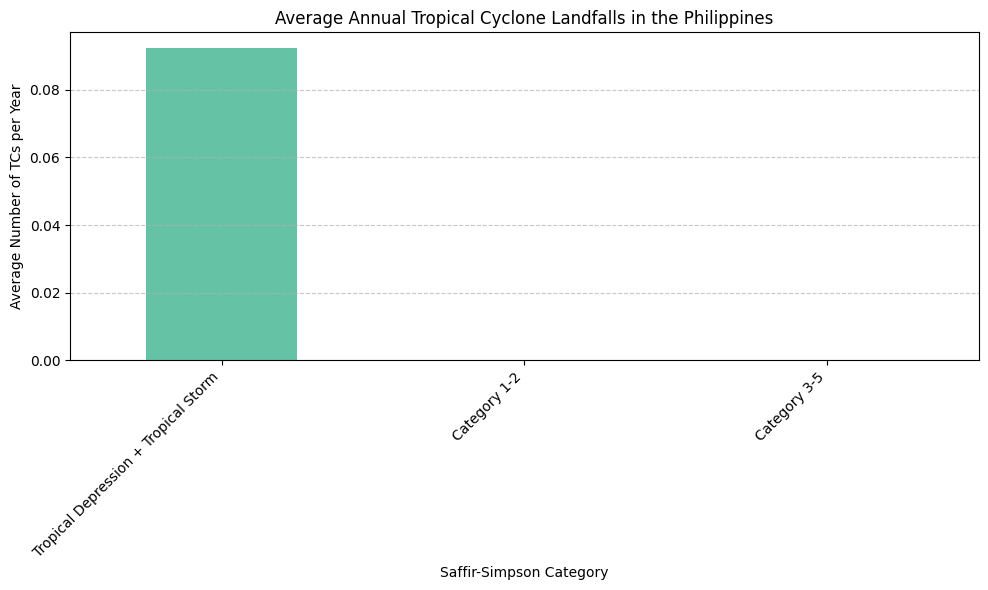

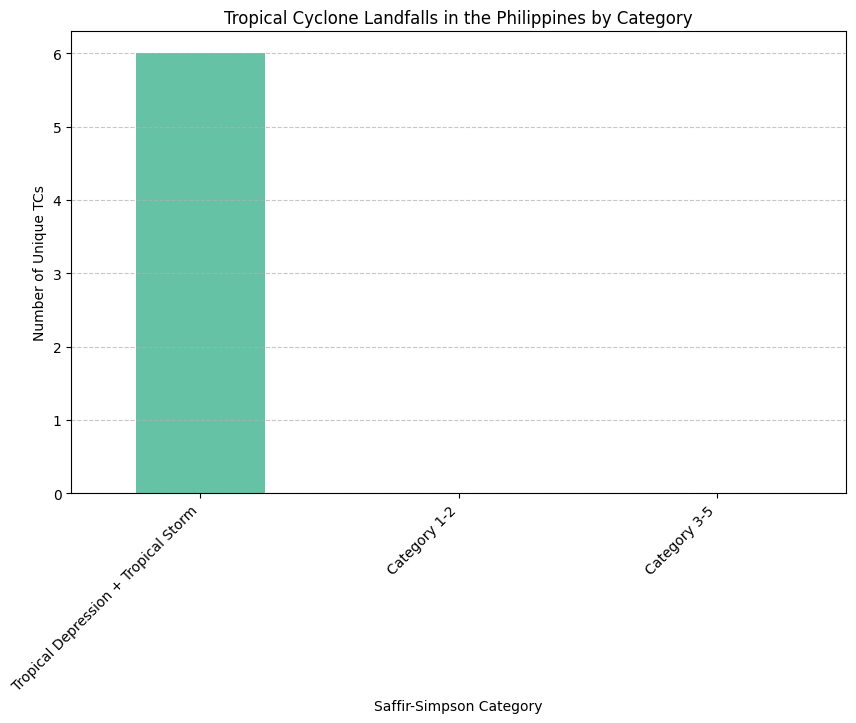

Number of unique tropical cyclones making landfall in the Philippines: 6
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 3
Category 1-2: 0
Category 3-5: 0


In [41]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts15 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65years
avg_tcs_per_year15 = landfall_counts15 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year15.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year15.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts15.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts3.items():
    print(f"{category}: {count}")

**round 2**

In [42]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highresSST-present_r2i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.12
Category 1-2: 0.00
Category 3-5: 0.02


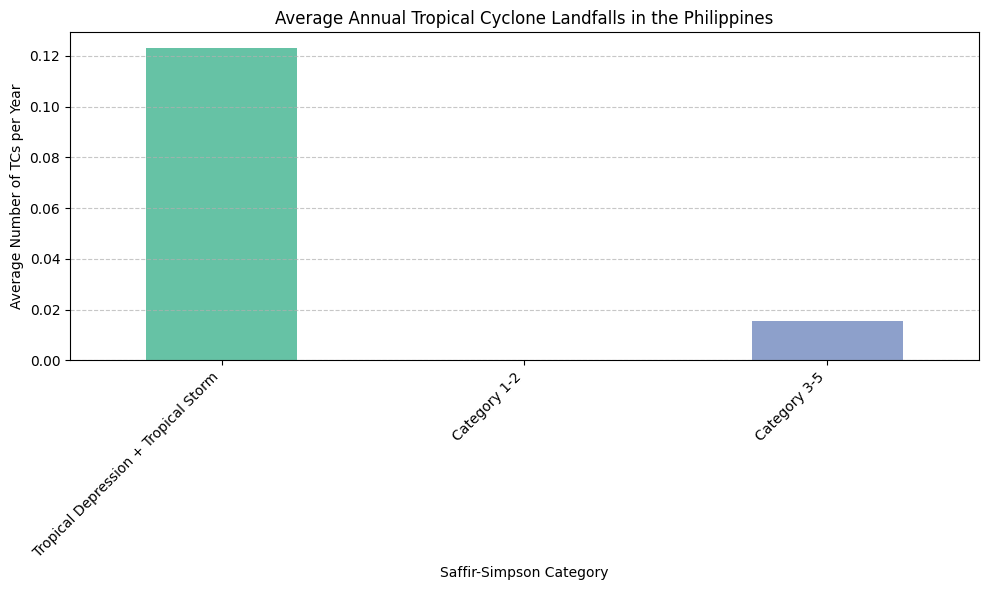

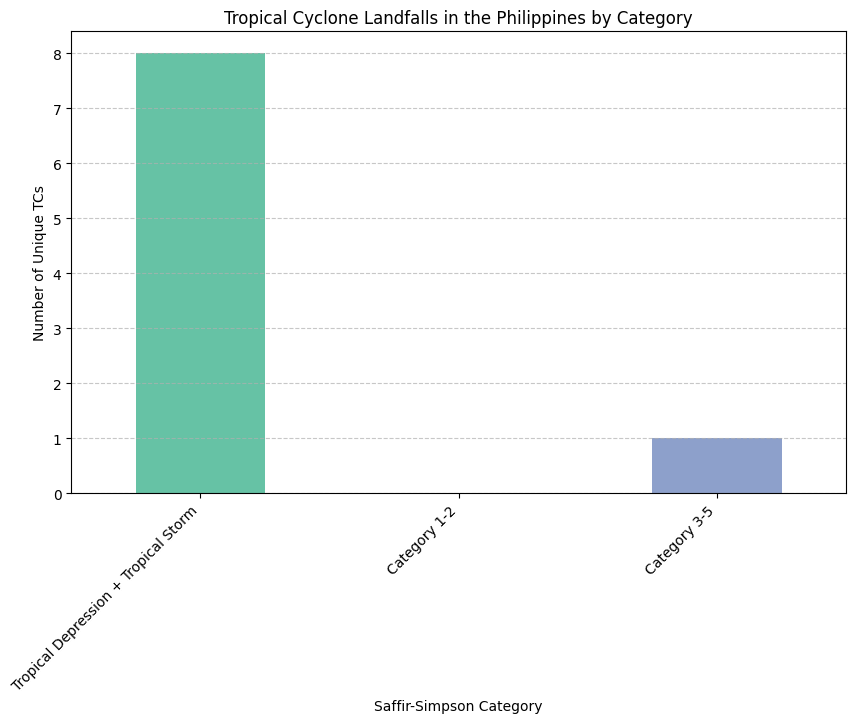

Number of unique tropical cyclones making landfall in the Philippines: 9
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 4
Category 1-2: 0
Category 3-5: 0


In [43]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts16 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65years
avg_tcs_per_year16 = landfall_counts16 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year16.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year16.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts16.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts4.items():
    print(f"{category}: {count}")

**round 3**

In [44]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highresSST-present_r3i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.18
Category 1-2: 0.00
Category 3-5: 0.00


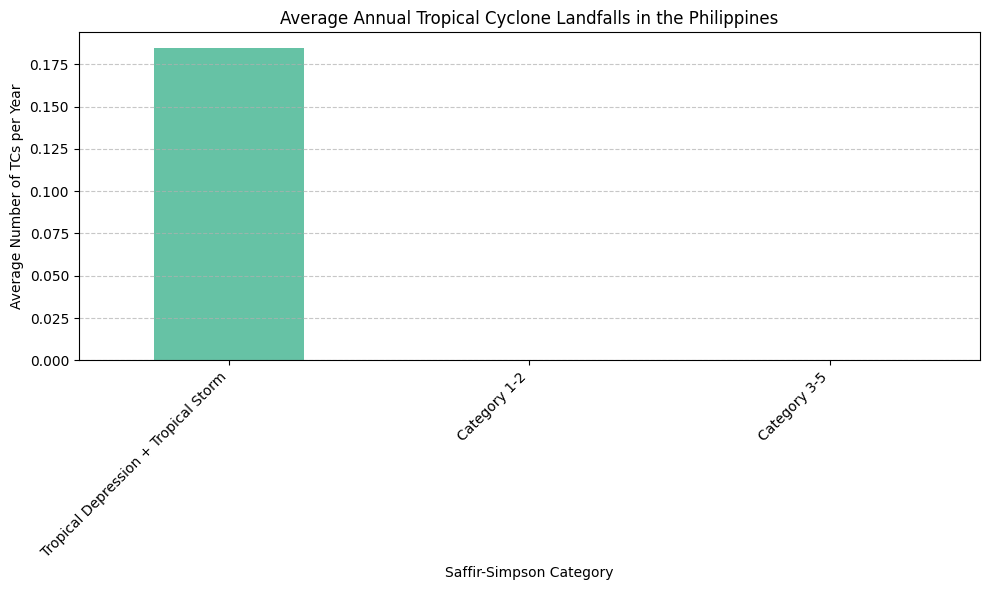

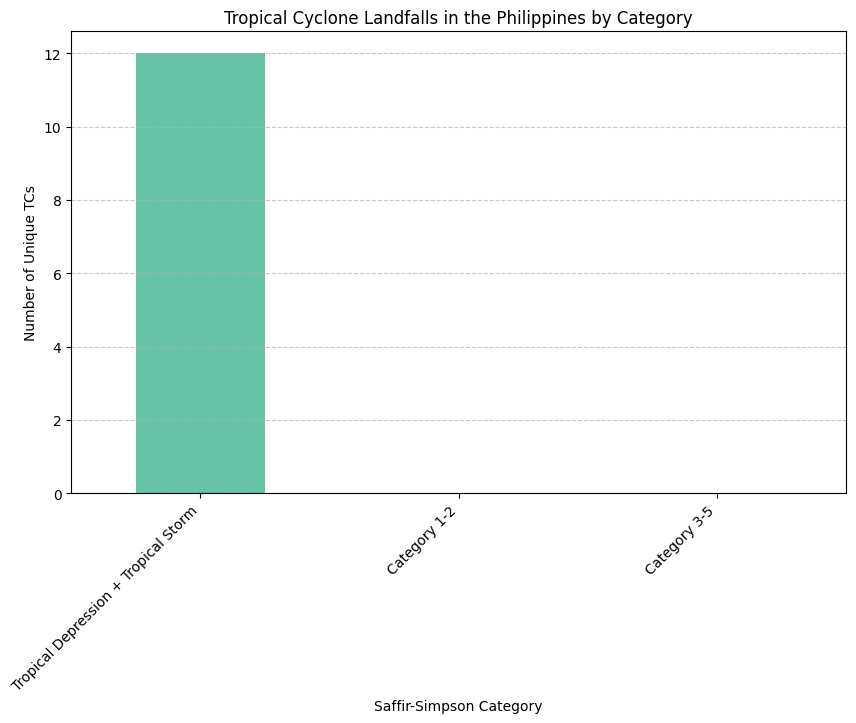

Number of unique tropical cyclones making landfall in the Philippines: 12
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 51
Category 1-2: 1
Category 3-5: 0


In [45]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts17 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65years
avg_tcs_per_year17 = landfall_counts17 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year17.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year17.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts17.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts5.items():
    print(f"{category}: {count}")

# **highresSST-future**

**round 1**

In [46]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highresSST-future_r1i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.28
Category 1-2: 0.00
Category 3-5: 0.00


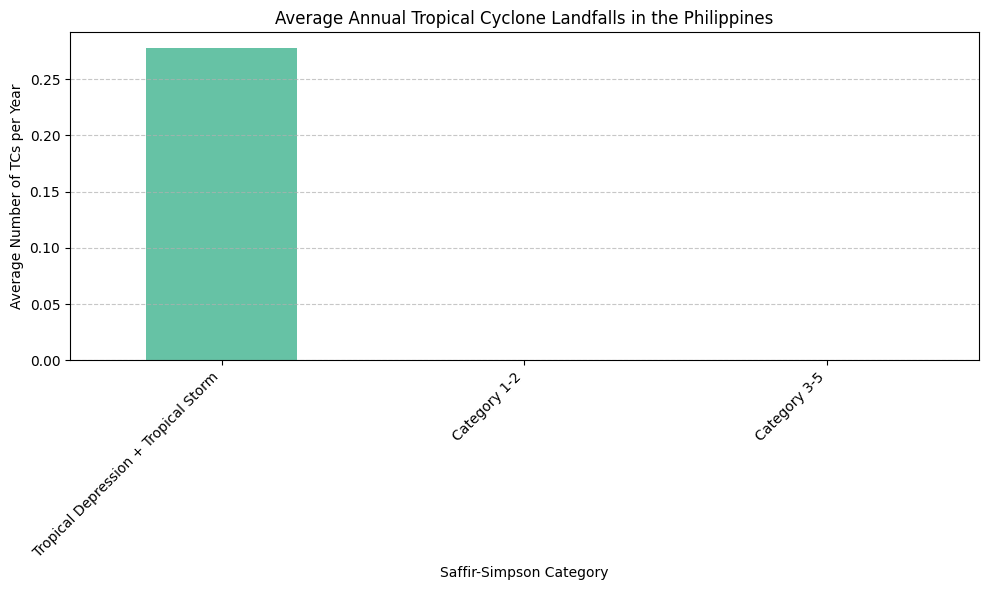

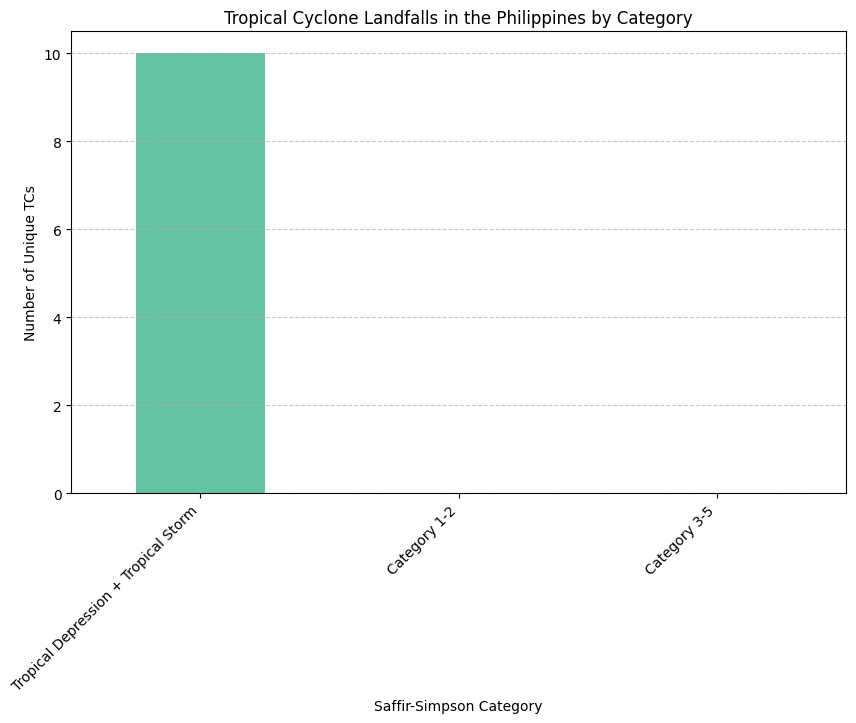

Number of unique tropical cyclones making landfall in the Philippines: 10
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 91
Category 1-2: 8
Category 3-5: 4


In [47]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts18 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2050 - 2015 + 1  # 36years
avg_tcs_per_year18 = landfall_counts18 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year18.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year18.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts18.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts6.items():
    print(f"{category}: {count}")

**round 2**

In [48]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highresSST-future_r2i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.11
Category 1-2: 0.00
Category 3-5: 0.00


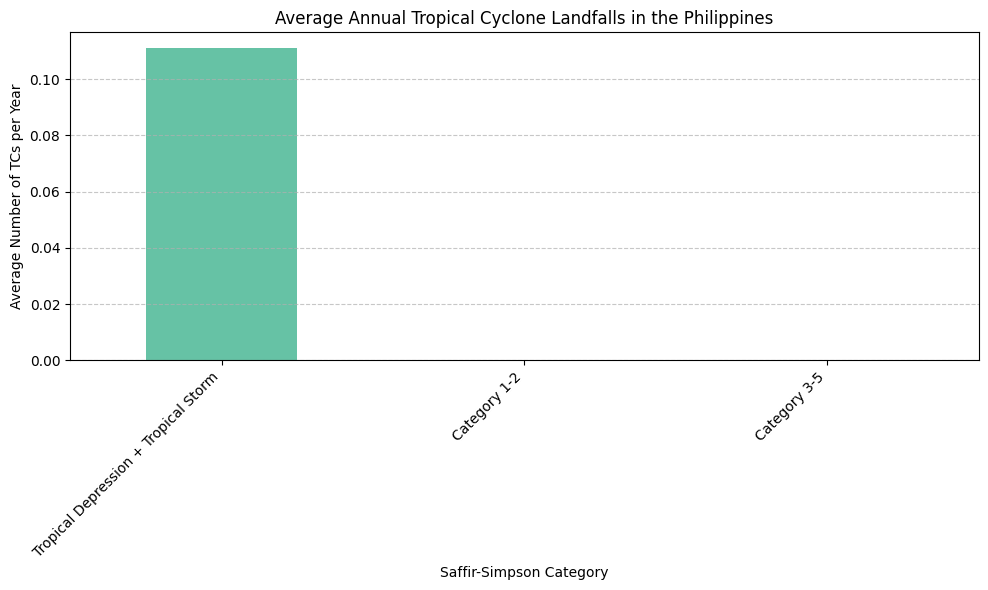

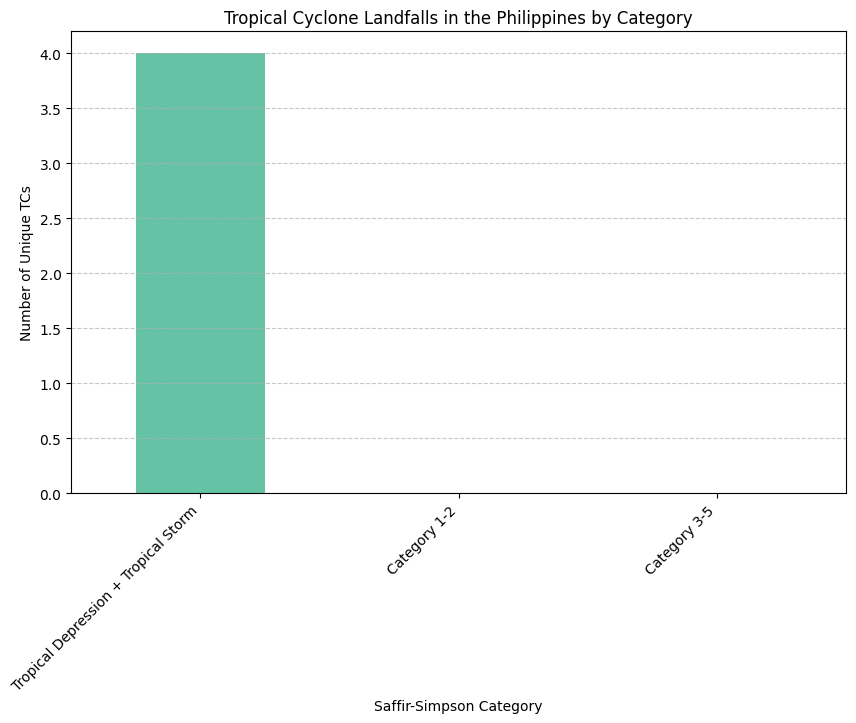

Number of unique tropical cyclones making landfall in the Philippines: 4
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 25
Category 1-2: 3
Category 3-5: 0


In [49]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts19 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2050 - 2015 + 1  # 36years
avg_tcs_per_year19 = landfall_counts19 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year19.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year19.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()




# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts19.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts7.items():
    print(f"{category}: {count}")

**round 3**

In [50]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highresSST-future_r3i1p1f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.25
Category 1-2: 0.00
Category 3-5: 0.00


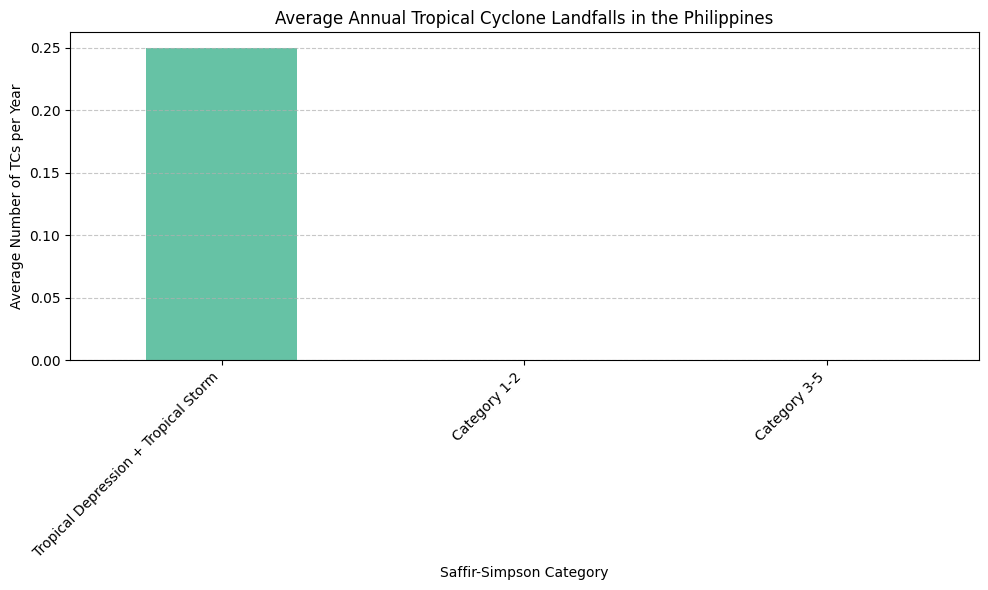

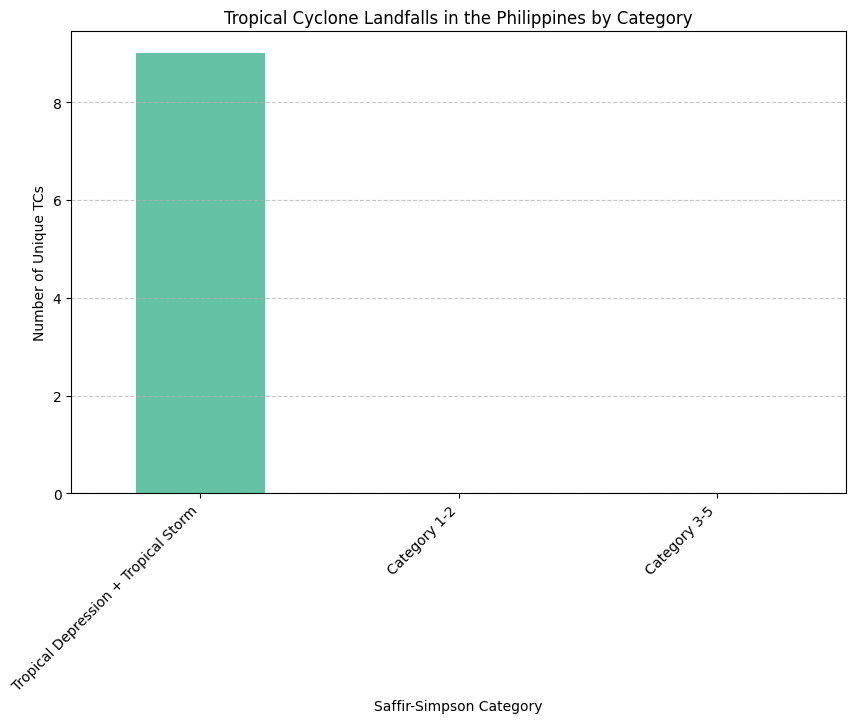

Number of unique tropical cyclones making landfall in the Philippines: 9
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 22
Category 1-2: 2
Category 3-5: 1


In [51]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts20 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2050 - 2015 + 1  # 36years
avg_tcs_per_year20 = landfall_counts20 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year20.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year20.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts20.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts8.items():
    print(f"{category}: {count}")

# **highres-future**

**round 1**

In [52]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highres-future_r1i1p2f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.17
Category 1-2: 0.00
Category 3-5: 0.00


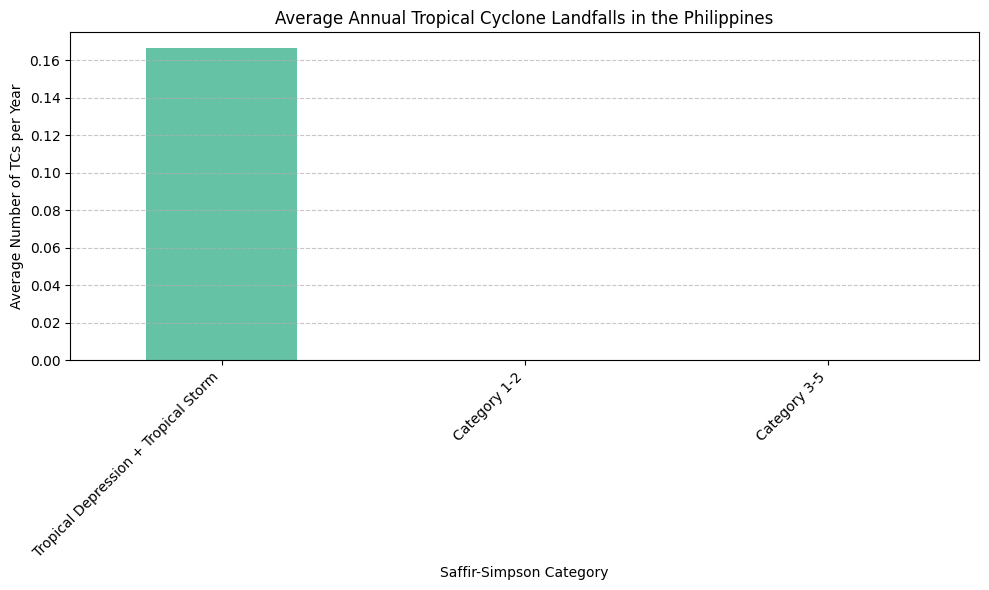

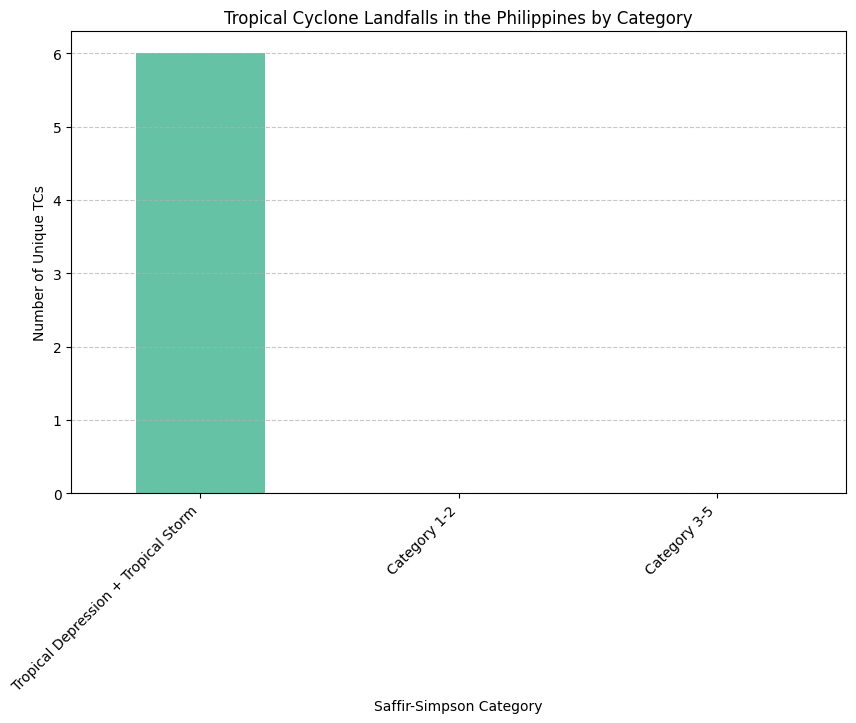

Number of unique tropical cyclones making landfall in the Philippines: 6
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 20
Category 1-2: 1
Category 3-5: 3


In [53]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts21 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2050 - 2015 + 1  # 36years
avg_tcs_per_year21 = landfall_counts21 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year21.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year21.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts21.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts9.items():
    print(f"{category}: {count}")

**round 2**

In [54]:
# Define file paths
tc_shapefile = "EC-Earth3P-HR_highres-future_r2i1p2f1_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.11
Category 1-2: 0.00
Category 3-5: 0.00


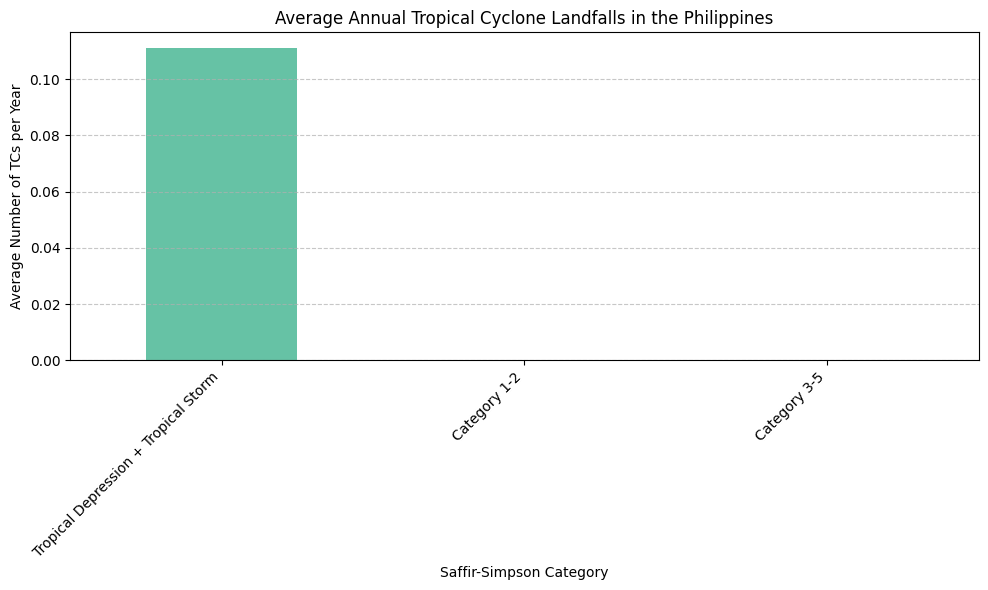

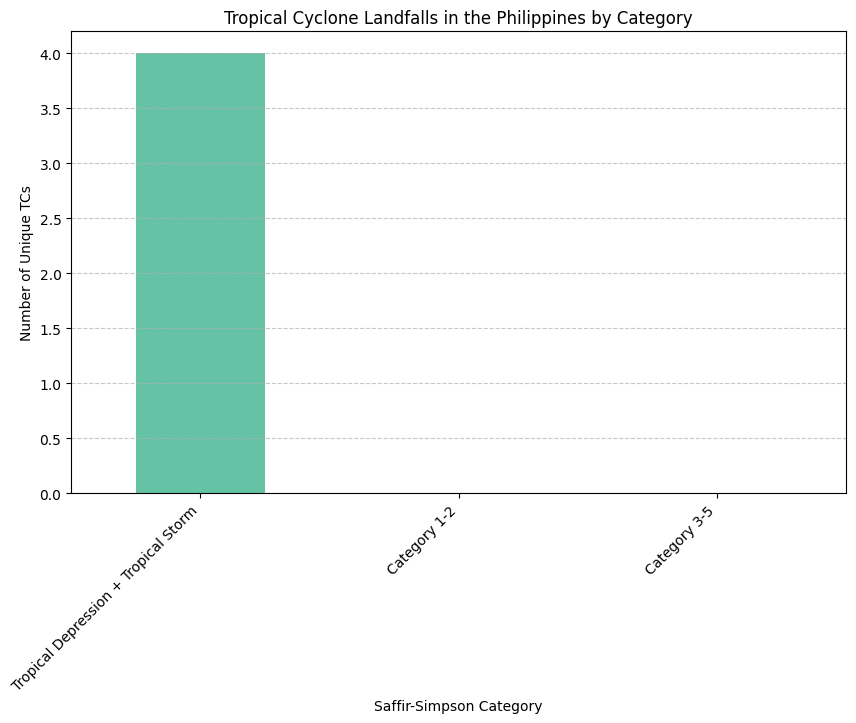

Number of unique tropical cyclones making landfall in the Philippines: 4
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 3
Category 1-2: 0
Category 3-5: 0


In [55]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts22 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2050 - 2015 + 1  # 36years
avg_tcs_per_year22 = landfall_counts22 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year22.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year22.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts22.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts10.items():
    print(f"{category}: {count}")

# **Result of EC-EARTH3P-HR**

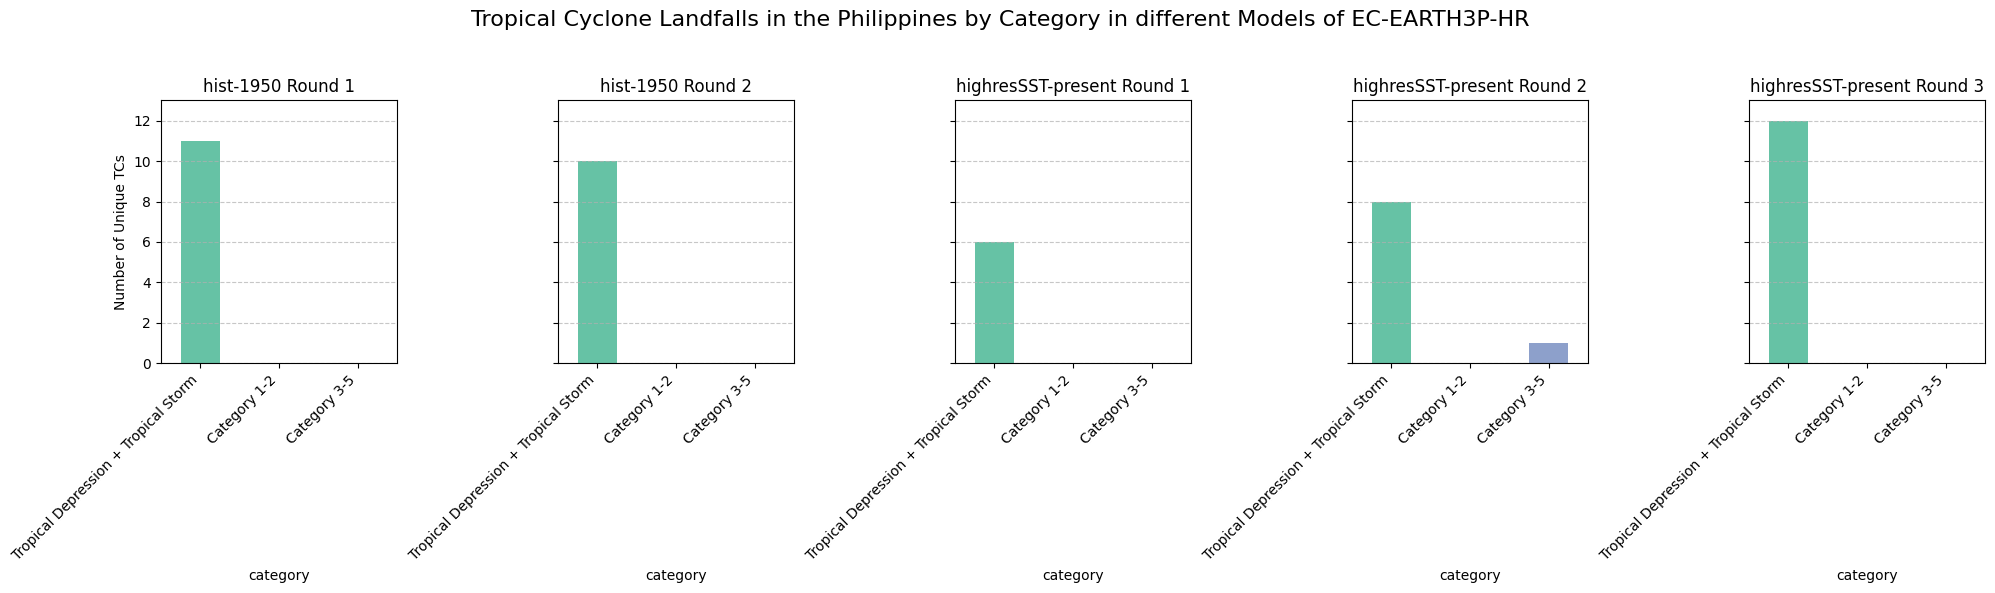

In [56]:
# List of landfall counts and their labels
landfall_counts_list = [
    (landfall_counts13, "hist-1950 Round 1"),
    (landfall_counts14, "hist-1950 Round 2"),
    (landfall_counts15, "highresSST-present Round 1"),
    (landfall_counts16, "highresSST-present Round 2"),
    (landfall_counts17, "highresSST-present Round 3"),
]

fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in landfall_counts_list])

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot each bar chart
for i, (counts, label) in enumerate(landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Tropical Cyclone Landfalls in the Philippines by Category in different Models of EC-EARTH3P-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

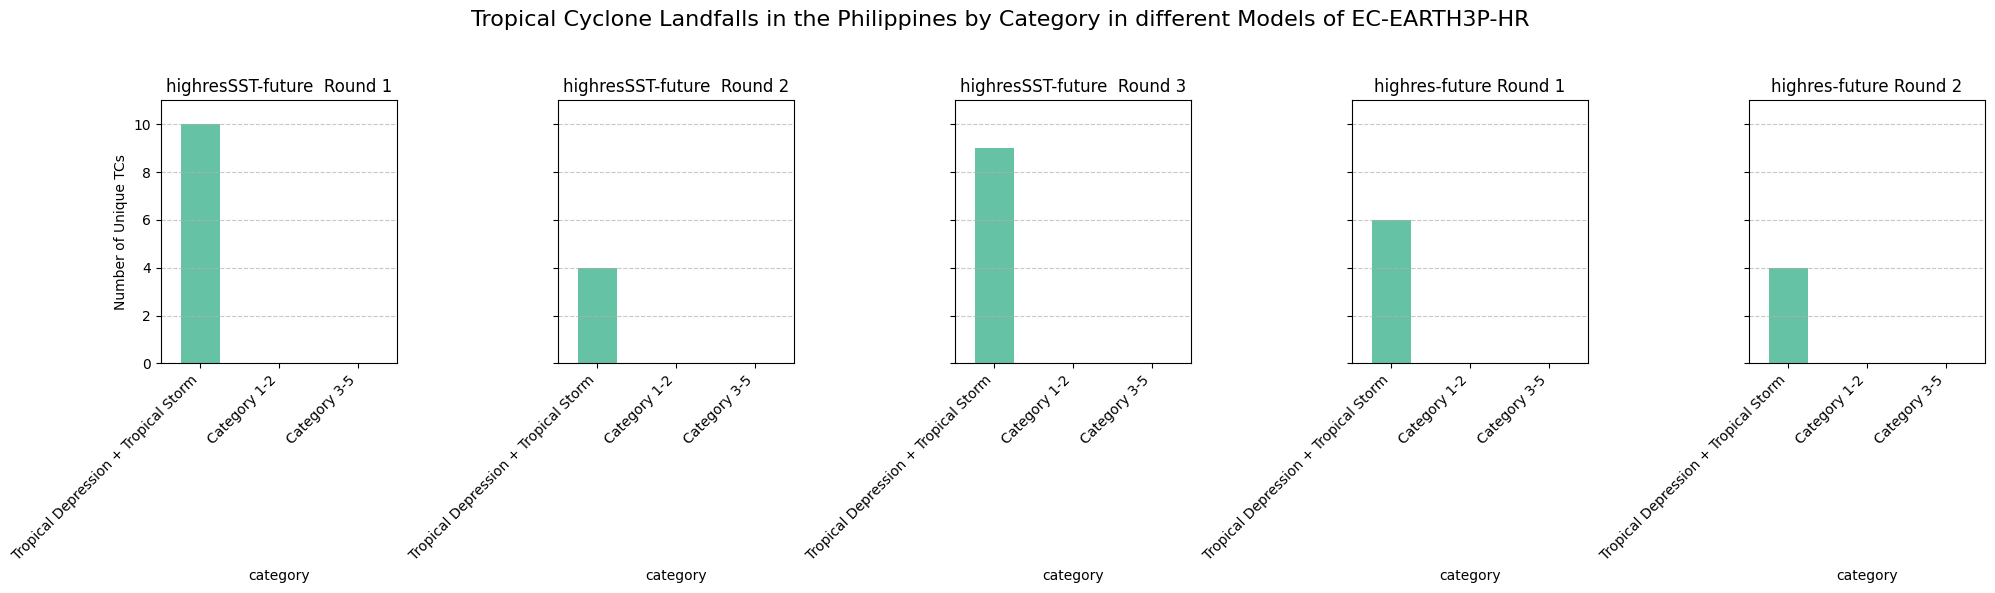

In [57]:
# List of landfall counts and their labels
landfall_counts_list = [
    (landfall_counts18, "highresSST-future  Round 1"),
    (landfall_counts19, "highresSST-future  Round 2"),
    (landfall_counts20, "highresSST-future  Round 3"),
    (landfall_counts21, "highres-future Round 1"),
    (landfall_counts22, "highres-future Round 2")
]

fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in landfall_counts_list])

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot each bar chart
for i, (counts, label) in enumerate(landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Tropical Cyclone Landfalls in the Philippines by Category in different Models of EC-EARTH3P-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

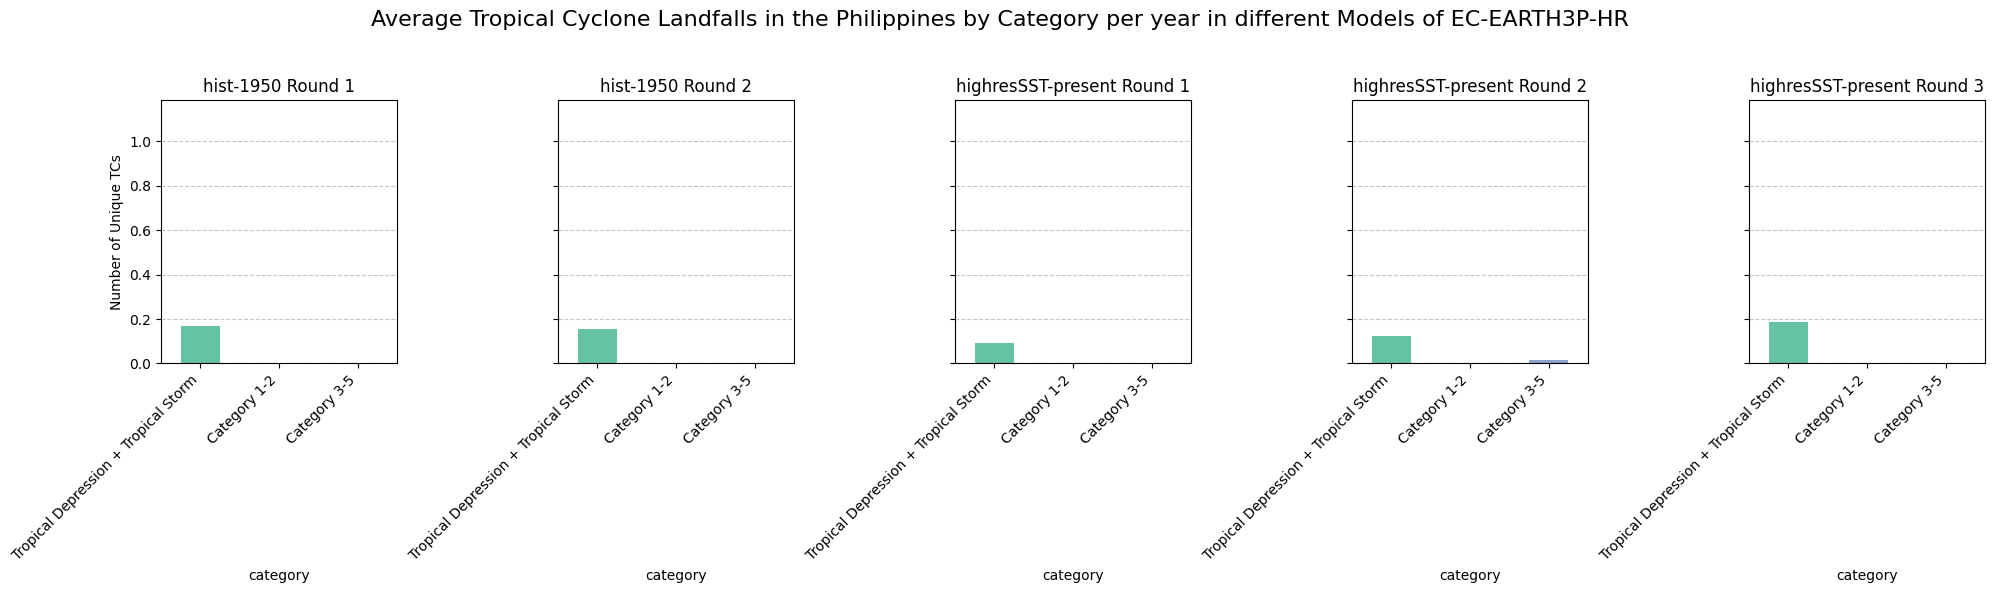

In [58]:
# List of landfall counts and their labels
landfall_counts_list = [
    (avg_tcs_per_year13, "hist-1950 Round 1"),
    (avg_tcs_per_year14, "hist-1950 Round 2"),
    (avg_tcs_per_year15, "highresSST-present Round 1"),
    (avg_tcs_per_year16, "highresSST-present Round 2"),
    (avg_tcs_per_year17, "highresSST-present Round 3")
]

# Create subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone Landfalls in the Philippines by Category per year in different Models of EC-EARTH3P-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

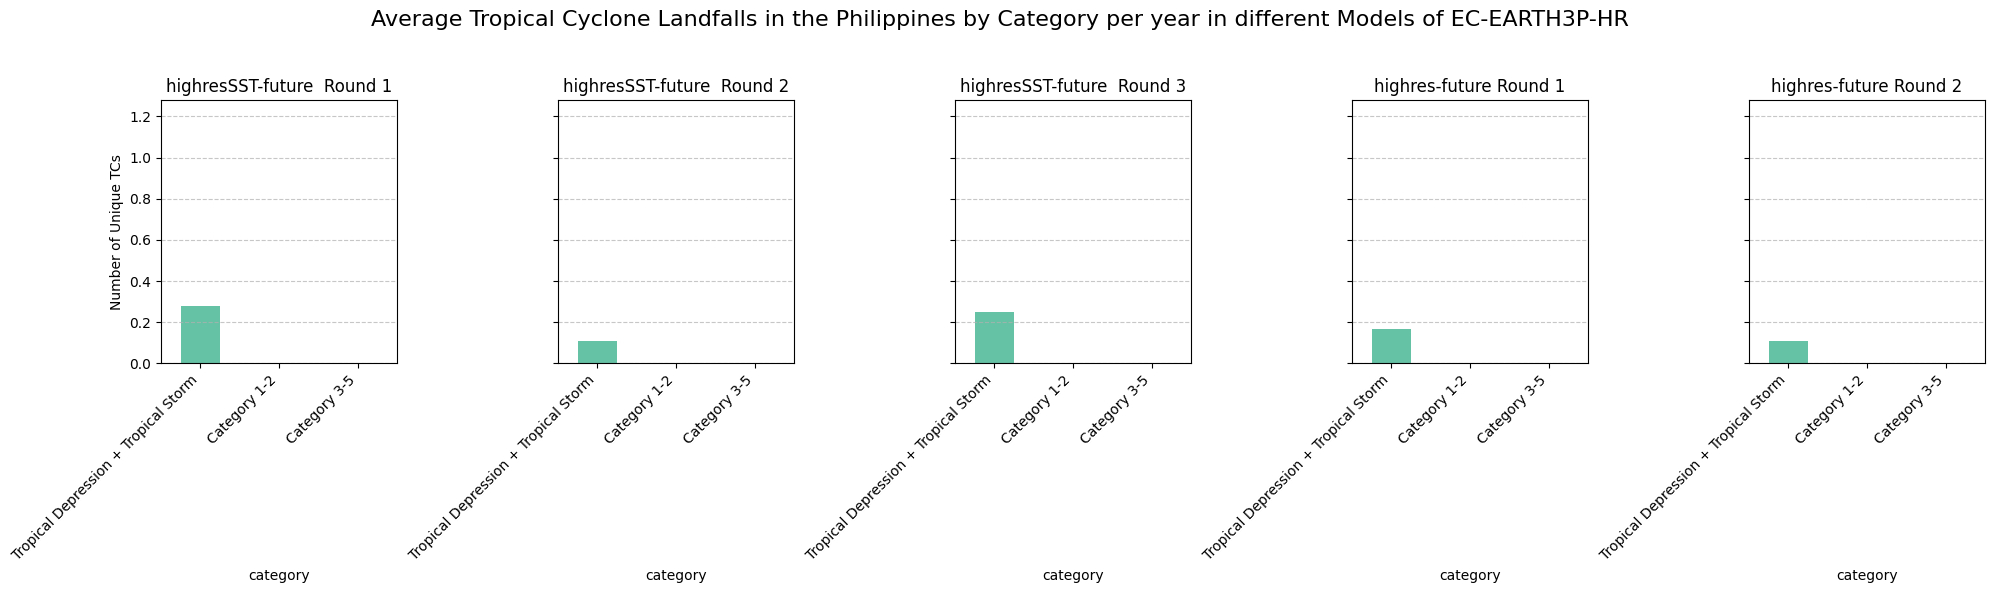

In [59]:
# List of landfall counts and their labels
avg_landfall_counts_list = [
    (avg_tcs_per_year18, "highresSST-future  Round 1"),
    (avg_tcs_per_year19, "highresSST-future  Round 2"),
    (avg_tcs_per_year20, "highresSST-future  Round 3"),
    (avg_tcs_per_year21, "highres-future Round 1"),
    (avg_tcs_per_year22, "highres-future Round 2")
]

# Create subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone Landfalls in the Philippines by Category per year in different Models of EC-EARTH3P-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

In [60]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("hist-1950 Round 1", landfall_counts13, avg_tcs_per_year13),
    ("hist-1950 Round 2", landfall_counts14, avg_tcs_per_year14),
    ("highresSST-present Round 1", landfall_counts15, avg_tcs_per_year15),
    ("highresSST-present Round 2", landfall_counts16, avg_tcs_per_year16),
    ("highresSST-present Round 3", landfall_counts17, avg_tcs_per_year17),
    ("highresSST-future  Round 1", landfall_counts18, avg_tcs_per_year18),
    ("highresSST-future  Round 2", landfall_counts19, avg_tcs_per_year19),
    ("highresSST-future  Round 3", landfall_counts20, avg_tcs_per_year20),
    ("highres-future Round 1", landfall_counts21, avg_tcs_per_year21),
    ("highres-future Round 2", landfall_counts22, avg_tcs_per_year22)

]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of EC-EARTH3P-HR.csv', index=False)
print("\nData saved to 'Result of EC-EARTH3P-HR.csv' ")


Data saved to 'Result of EC-EARTH3P-HR.csv' 


# **1.5 CNRM-CM6-1-HR**

# **highres-future**

In [61]:
# Define file paths
tc_shapefile = "CNRM-CM6-1-HR_highres-future_r1i1p1f2_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 1.92
Category 1-2: 0.53
Category 3-5: 0.19


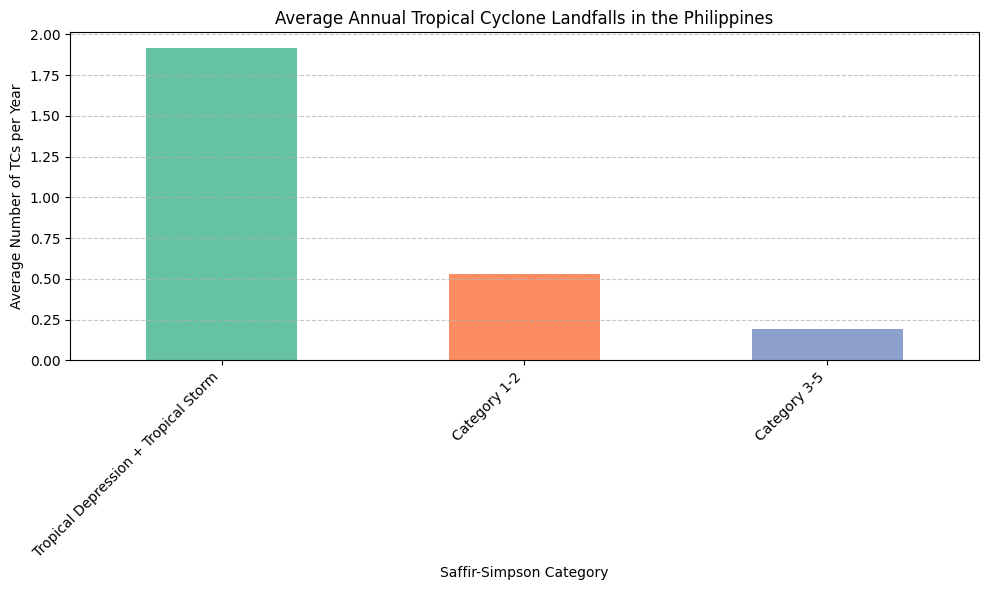

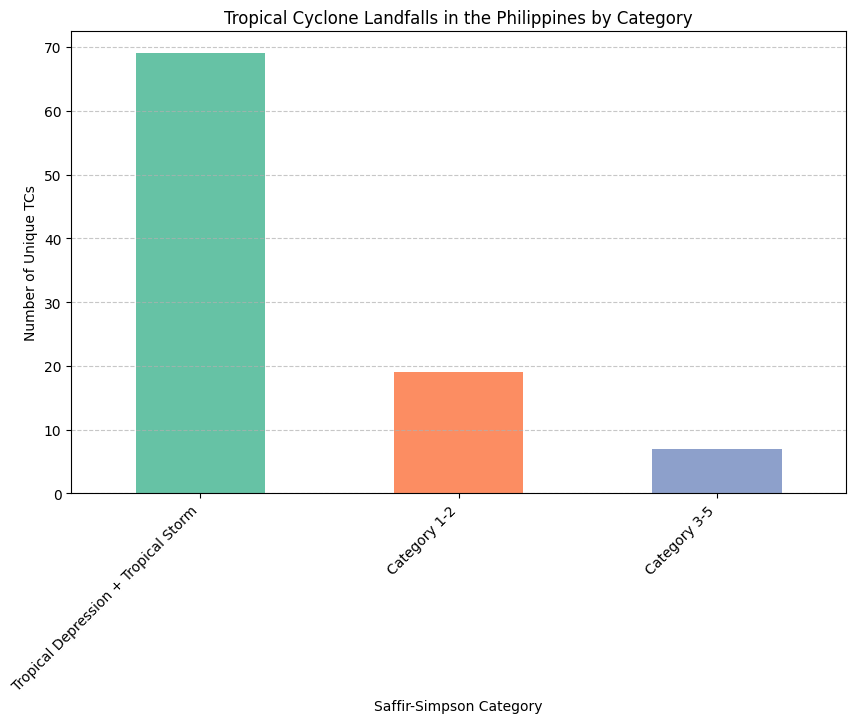

Number of unique tropical cyclones making landfall in the Philippines: 95
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 1
Category 1-2: 0
Category 3-5: 0


In [62]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts23 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2050 - 2015 + 1  # 36years
avg_tcs_per_year23 = landfall_counts23 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year23.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year23.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts23.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts1.items():
    print(f"{category}: {count}")

# **highresSST-future**

In [63]:
# Define file paths
tc_shapefile = "CNRM-CM6-1-HR_highresSST-future_r1i1p1f2_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 1.03
Category 1-2: 0.14
Category 3-5: 0.14


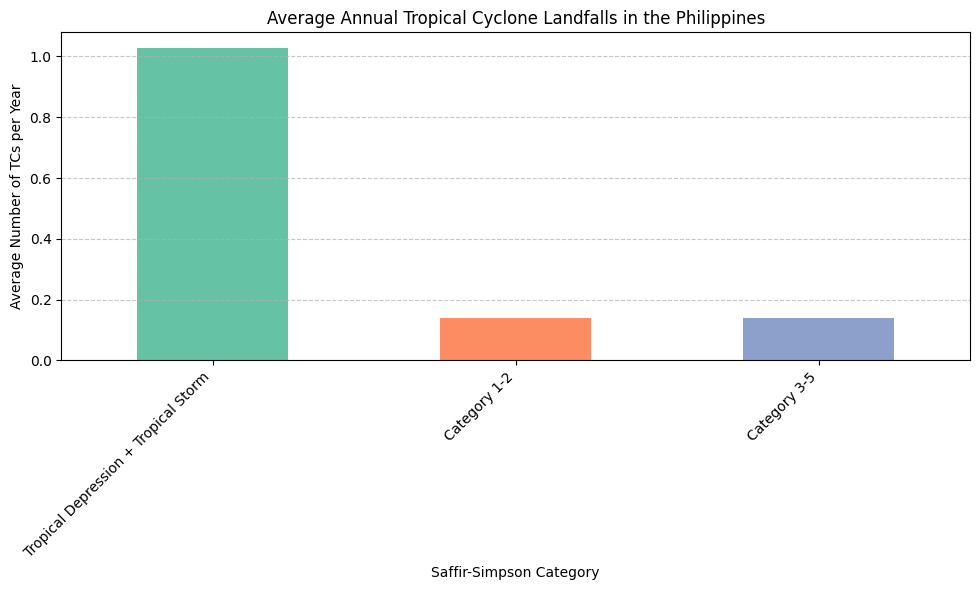

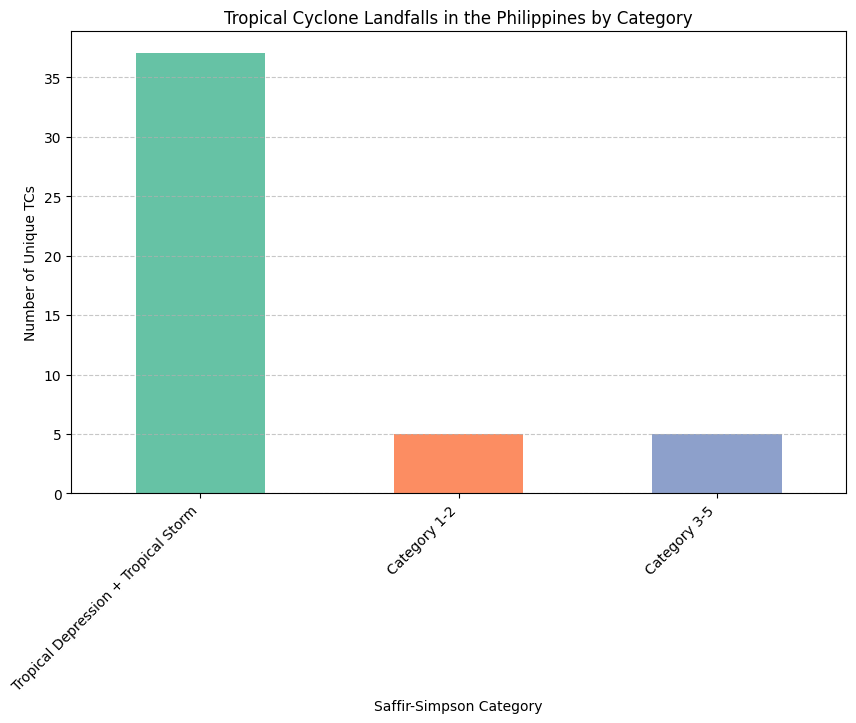

Number of unique tropical cyclones making landfall in the Philippines: 47
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 4
Category 1-2: 0
Category 3-5: 0


In [64]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts24 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2050 - 2015 + 1  # 36years
avg_tcs_per_year24 = landfall_counts24 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year24.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year24.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts24.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts2.items():
    print(f"{category}: {count}")

# **highresSST-present**

In [65]:
# Define file paths
tc_shapefile = "CNRM-CM6-1-HR_highresSST-present_r1i1p1f2_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 0.77
Category 1-2: 0.12
Category 3-5: 0.03


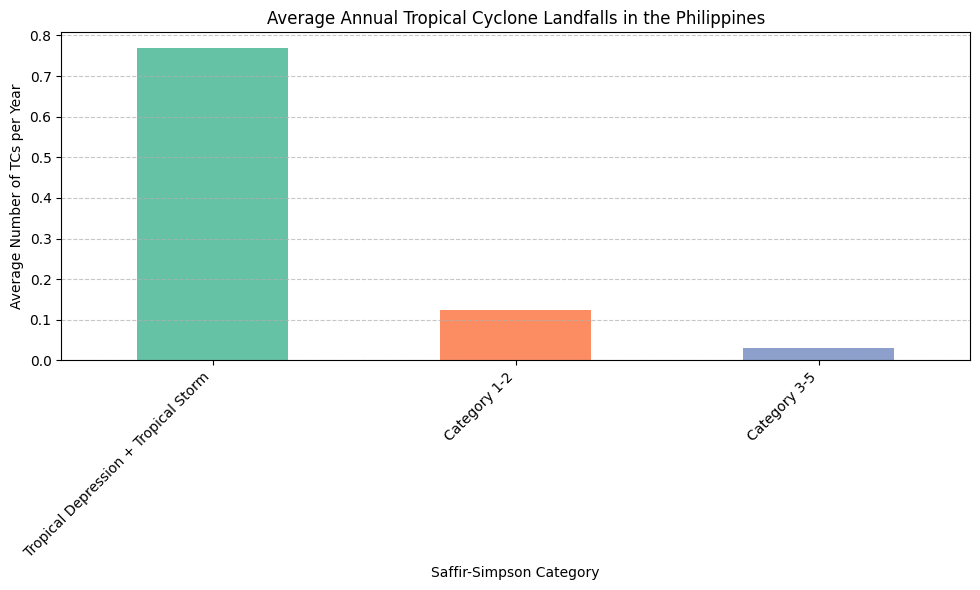

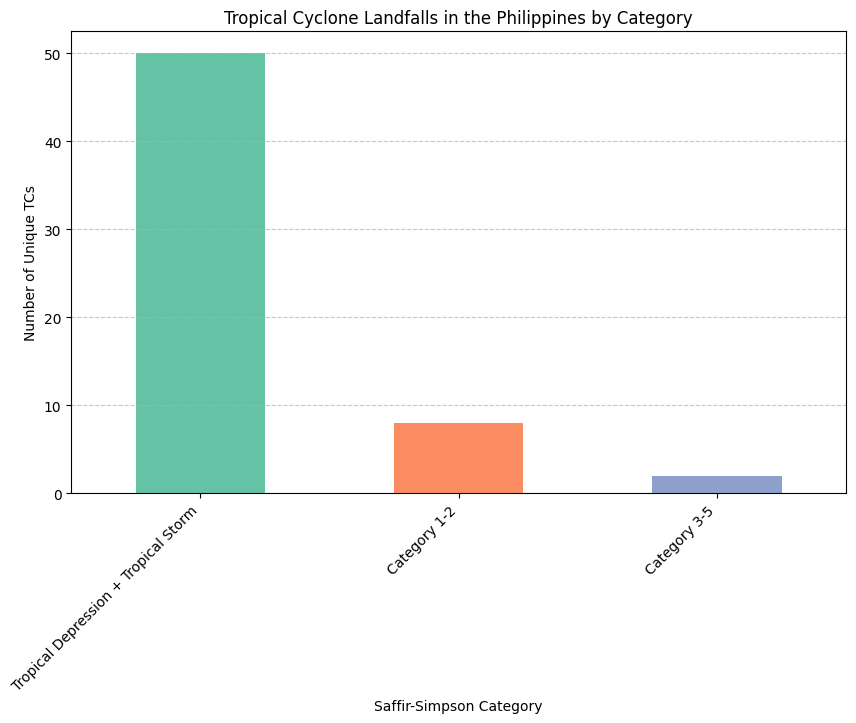

Number of unique tropical cyclones making landfall in the Philippines: 60
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 3
Category 1-2: 0
Category 3-5: 0


In [66]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts25 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65years
avg_tcs_per_year25 = landfall_counts25 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year25.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year25.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts25.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts3.items():
    print(f"{category}: {count}")

# **hist-1950**

In [67]:
# Define file paths
tc_shapefile = "CNRM-CM6-1-HR_hist-1950_r1i1p1f2_gr_track_nodes_WP.shp"

# Load the shapefiles
tc_tracks = gpd.read_file(tc_shapefile)


Average number of tropical cyclone landfalls per year:
Tropical Depression + Tropical Storm: 1.94
Category 1-2: 0.69
Category 3-5: 0.23


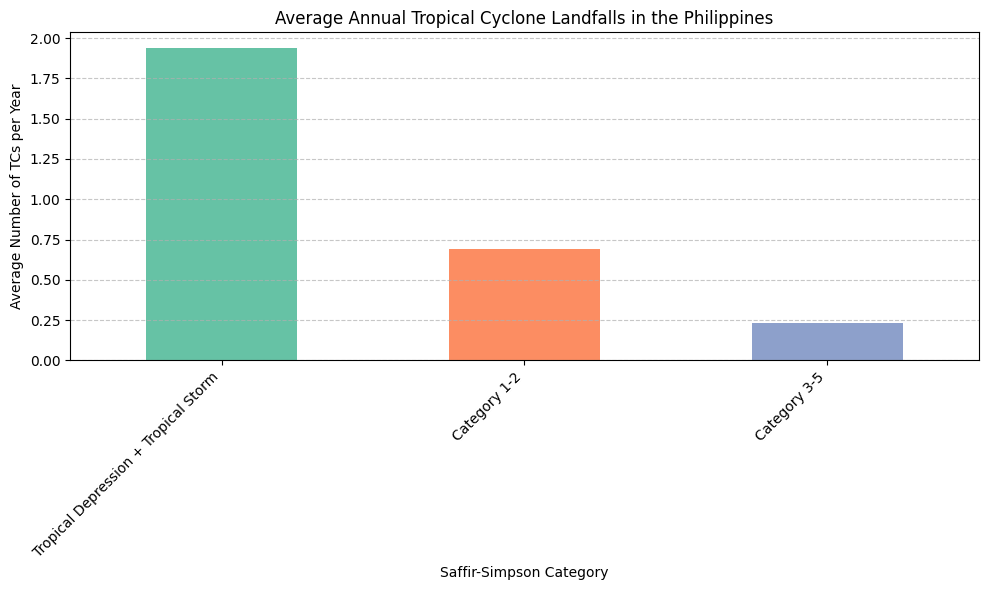

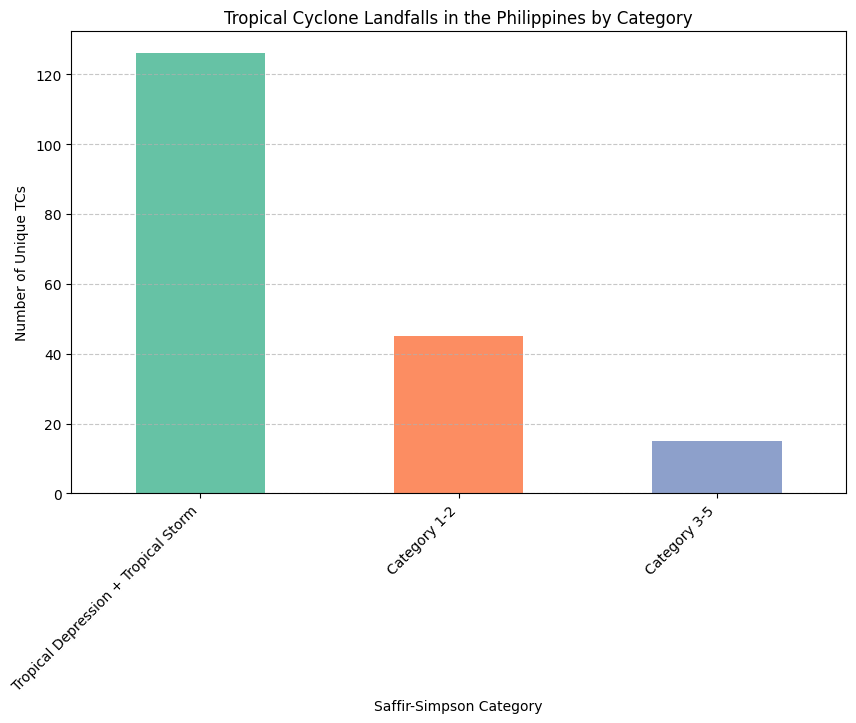

Number of unique tropical cyclones making landfall in the Philippines: 186
Number of unique tropical cyclones making landfall in the Philippines by category:
Tropical Depression + Tropical Storm: 4
Category 1-2: 0
Category 3-5: 0


In [68]:
# Ensure both GeoDataFrames use the same coordinate reference system (CRS)
# Typically, TC data uses WGS84 (EPSG:4326)
if tc_tracks.crs != philippines.crs:
    philippines = philippines.to_crs(tc_tracks.crs)

# Find TC nodes that intersect with the buffered Philippines boundary
tc_landfall_nodes = gpd.sjoin(tc_tracks, philippines_buffer, how='inner', predicate='intersects')

# Function to categorize TCs based on Saffir-Simpson scale (wind speed in m/s)
def categorize_tc(wind_speed):
    if wind_speed <= 32:
        return "Tropical Depression + Tropical Storm"
    elif 33 <= wind_speed <= 49:
        return "Category 1-2"
    else:  # wind_speed >= 50
        return "Category 3-5"

# Apply categorization to landfall nodes
tc_landfall_nodes['category'] = tc_landfall_nodes['Gust_1min'].apply(categorize_tc)

# For each TC, find the maximum wind speed at landfall to assign a single category
tc_max_wind = tc_landfall_nodes.groupby('TRACK_ID').agg({
    'Gust_1min': 'max'
}).reset_index()
tc_max_wind['category'] = tc_max_wind['Gust_1min'].apply(categorize_tc)

# Count unique TCs in each category
landfall_counts26 = tc_max_wind['category'].value_counts().reindex([
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
], fill_value=0)


# Count unique TCs that make landfall
unique_landfall_tcs = tc_landfall_nodes['TRACK_ID'].nunique()

total_years = 2014 - 1950 + 1  # 65years
avg_tcs_per_year26 = landfall_counts26 / total_years
print("\nAverage number of tropical cyclone landfalls per year:")
for category, avg in avg_tcs_per_year26.items():
    print(f"{category}: {avg:.2f}")

# Plot bar chart for average TCs per year
plt.figure(figsize=(10, 6))
avg_tcs_per_year26.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Average Annual Tropical Cyclone Landfalls in the Philippines')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Average Number of TCs per Year')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Plot bar chart
plt.figure(figsize=(10, 6))
landfall_counts26.plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Tropical Cyclone Landfalls in the Philippines by Category')
plt.xlabel('Saffir-Simpson Category')
plt.ylabel('Number of Unique TCs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Print results
print(f"Number of unique tropical cyclones making landfall in the Philippines: {unique_landfall_tcs}")

# Print results
print("Number of unique tropical cyclones making landfall in the Philippines by category:")
for category, count in landfall_counts4.items():
    print(f"{category}: {count}")

# **Result of CNRM-CM6-1-HR**

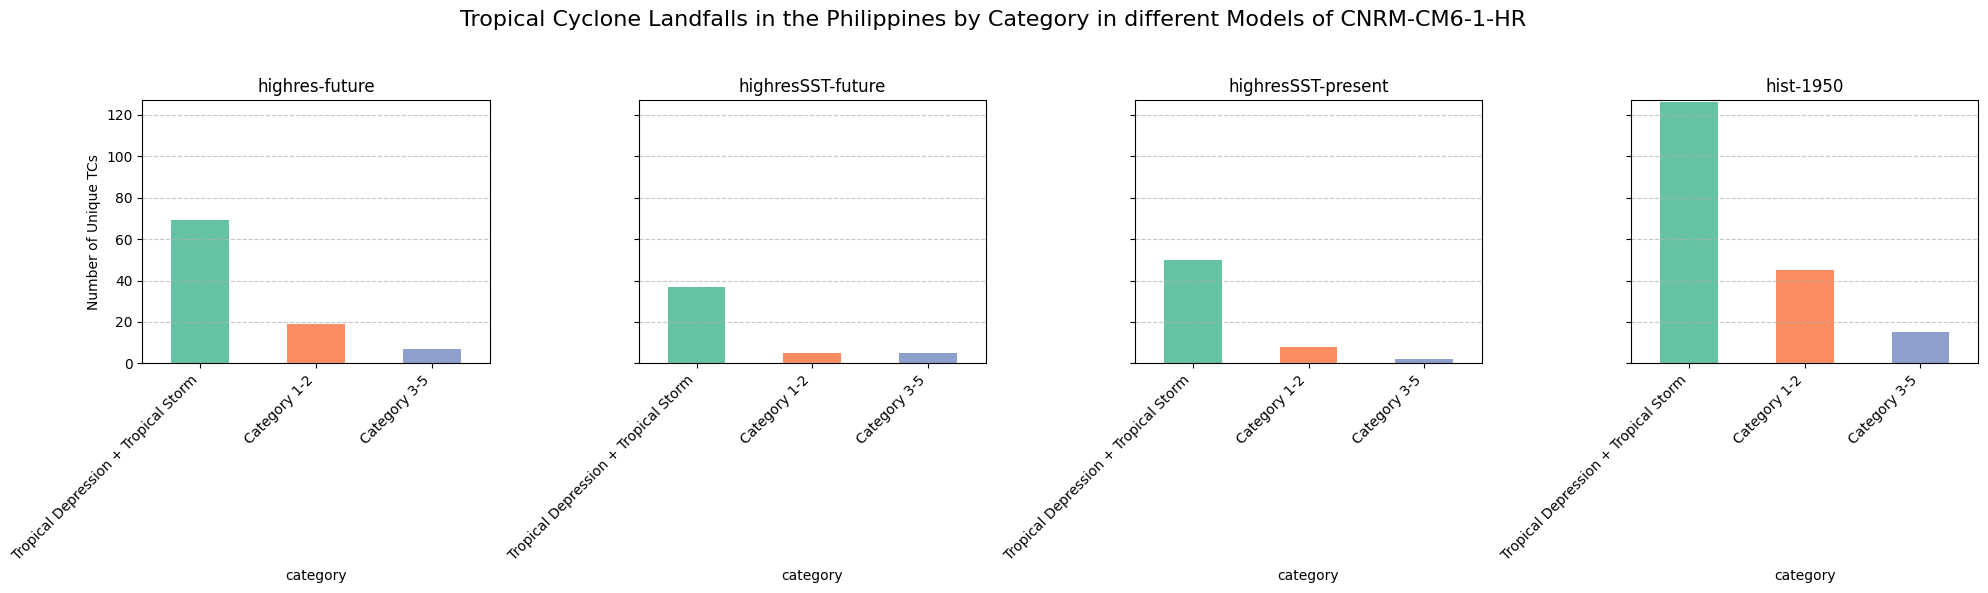

In [69]:
# List of landfall counts and their labels
landfall_counts_list = [
    (landfall_counts23, "highres-future"),
    (landfall_counts24, "highresSST-future"),
    (landfall_counts25, "highresSST-present"),
    (landfall_counts26, "hist-1950"),
]

fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in landfall_counts_list])

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot each bar chart
for i, (counts, label) in enumerate(landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Tropical Cyclone Landfalls in the Philippines by Category in different Models of CNRM-CM6-1-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

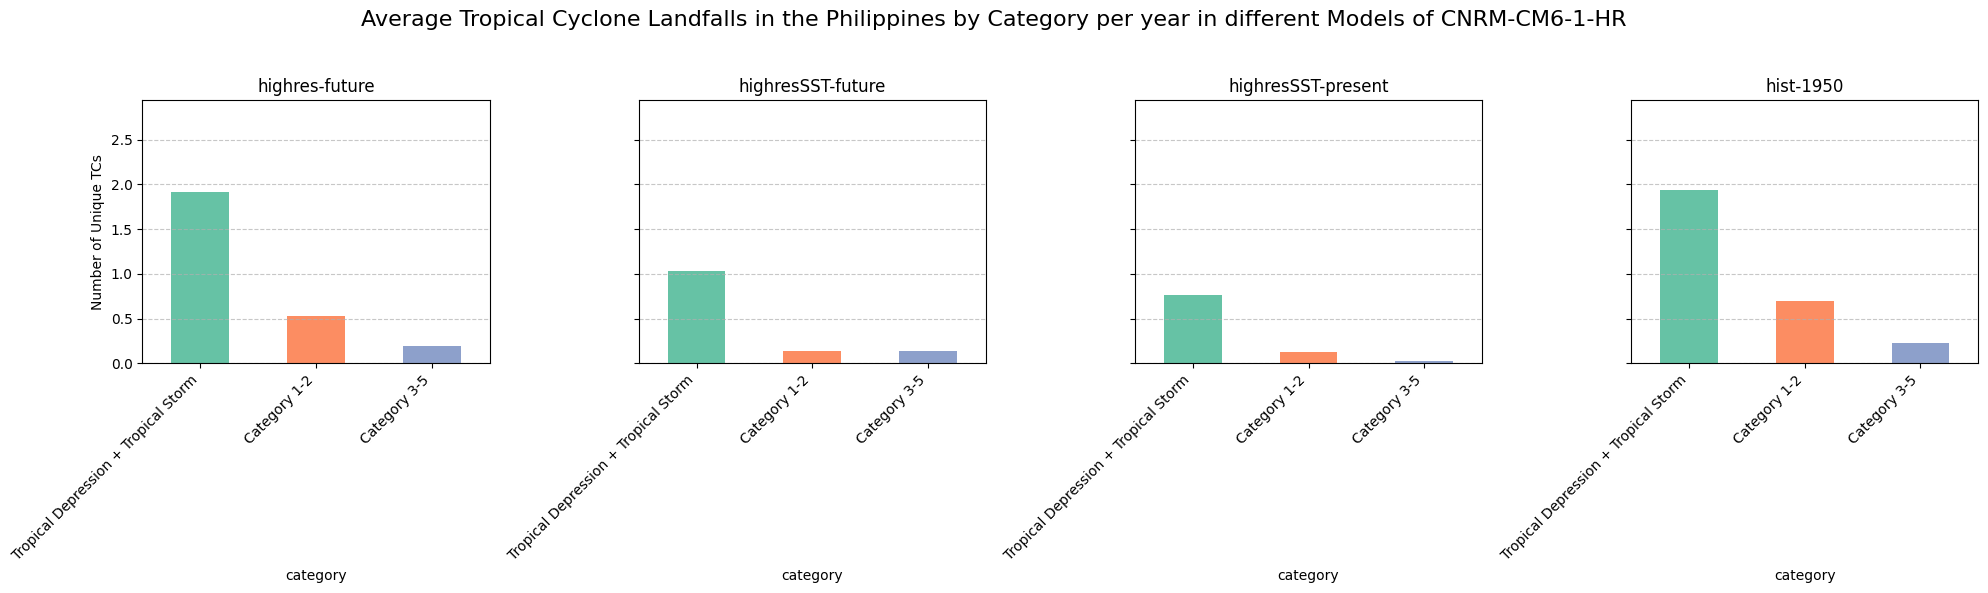

In [70]:
# List of landfall counts and their labels
avg_landfall_counts_list = [
    (avg_tcs_per_year23, "highres-future"),
    (avg_tcs_per_year24, "highresSST-future"),
    (avg_tcs_per_year25, "highresSST-present"),
    (avg_tcs_per_year26, "hist-1950")
]

# Create subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Colors for consistency across subplots
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Find the maximum y value for consistent y-axis limits
max_y = max([counts.max() for counts, _ in avg_landfall_counts_list])

# Plot each bar chart
for i, (counts, label) in enumerate(avg_landfall_counts_list):
    counts.plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(label)
    axes[i].set_ylabel('Number of Unique TCs' if i == 0 else '')
    axes[i].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[i].set_ylim(0, max_y + 1)  # Consistent y-axis limits
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Add a super title
plt.suptitle('Average Tropical Cyclone Landfalls in the Philippines by Category per year in different Models of CNRM-CM6-1-HR', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust for suptitle
plt.show()

# **Generate a CSV file**

In [71]:
# Save data to CSV
data = []
categories = [
    "Tropical Depression + Tropical Storm",
    "Category 1-2",
    "Category 3-5"
]

for dataset, counts, avg in [
    ("highres-future", landfall_counts23, avg_tcs_per_year23),
    ("highresSST-future", landfall_counts24, avg_tcs_per_year24),
    ("highresSST-present", landfall_counts25, avg_tcs_per_year25),
    ("hist-1950", landfall_counts26, avg_tcs_per_year26)
]:
    for category in categories:
        data.append({
            'Dataset': dataset,
            'Category': category,
            'Total_Count': counts.get(category, 0),
            'Average_Per_Year': avg.get(category, 0)
        })
df = pd.DataFrame(data)
df.to_csv('Result of CNRM-CM6-1-HR.csv', index=False)
print("\nData saved to 'Result of CNRM-CM6-1-HR.csv' ")


Data saved to 'Result of CNRM-CM6-1-HR.csv' 
